# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.





**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 45.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:


import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_main = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')
data = data_main.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [ ]:
print("number of rows: ",data.shape[0] ,"\n number of columns: " ,data.shape[1])

number of rows:  36275 
 number of columns:  19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations:**

- the data has 5 object type and the rest are numrice

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations**

-there are no null values

In [ ]:
data.duplicated().sum()

0

#### Observations:
- There are no duplicate values in the data.

In [ ]:
data.Booking_ID.nunique()

36275

In [ ]:
data = data.drop(["Booking_ID"], axis=1)

**Observations:**

- there is 36275 rows that have a uique booking ID so there is no need for it

In [ ]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

#### Observations:
- Most Bookings Have 2 Adults.

- Low Demand for Car Parking Space.

- High Lead Time: The average lead time is around 85 days, but some bookings are made very far in advance (up to 443 days).

- Cancellations Are Rare for Repeated Guests.


- Special Requests Are Infrequent: Most bookings have few or no special requests, with a maximum of 5 in some cases.

## Exploratory Data Analysis (EDA)


**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Observations:**

- these are some functions that will help streamline the EDA   

###Univariate Analysis

In [ ]:
numerical_features = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests'
]

categorical_features = [
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status',
    'required_car_parking_space', 'repeated_guest'
]

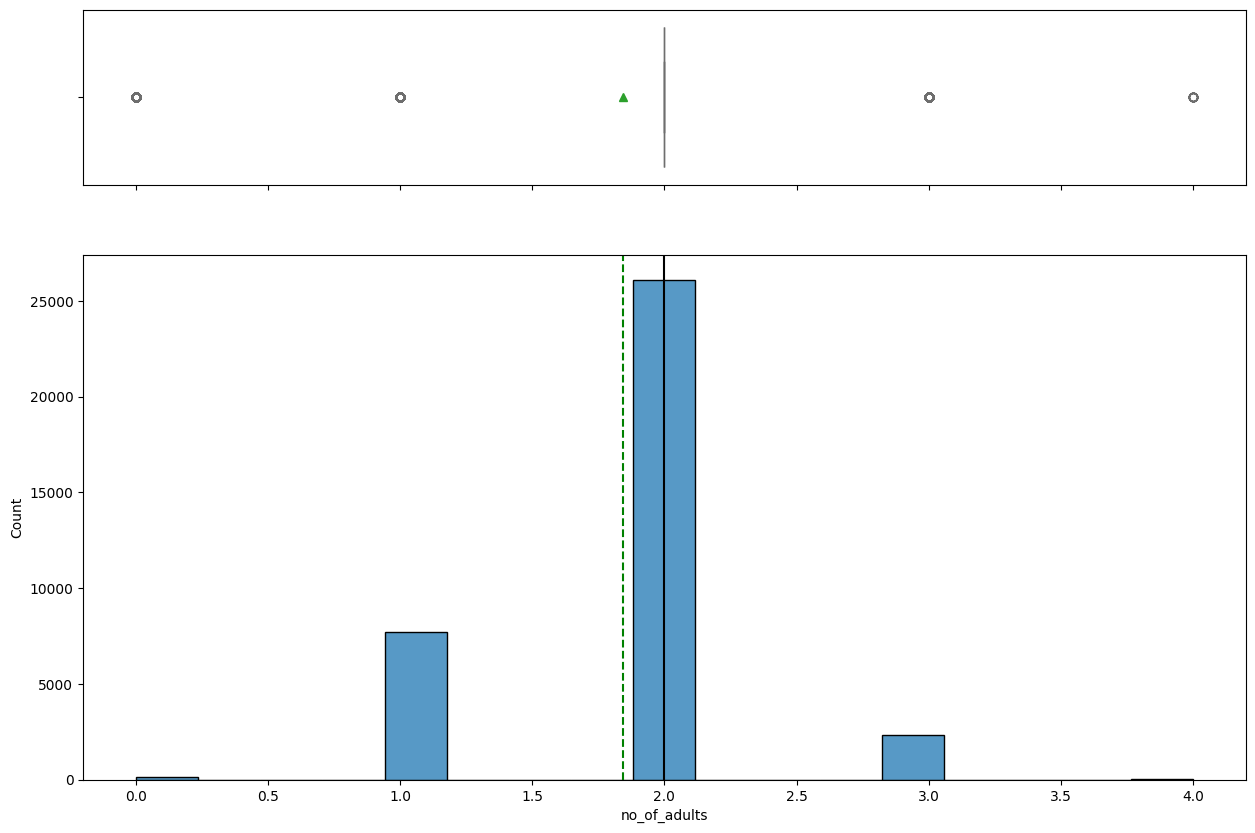

In [ ]:
histogram_boxplot(data, numerical_features[0])

**Observations:**

- most of them are 2 adults

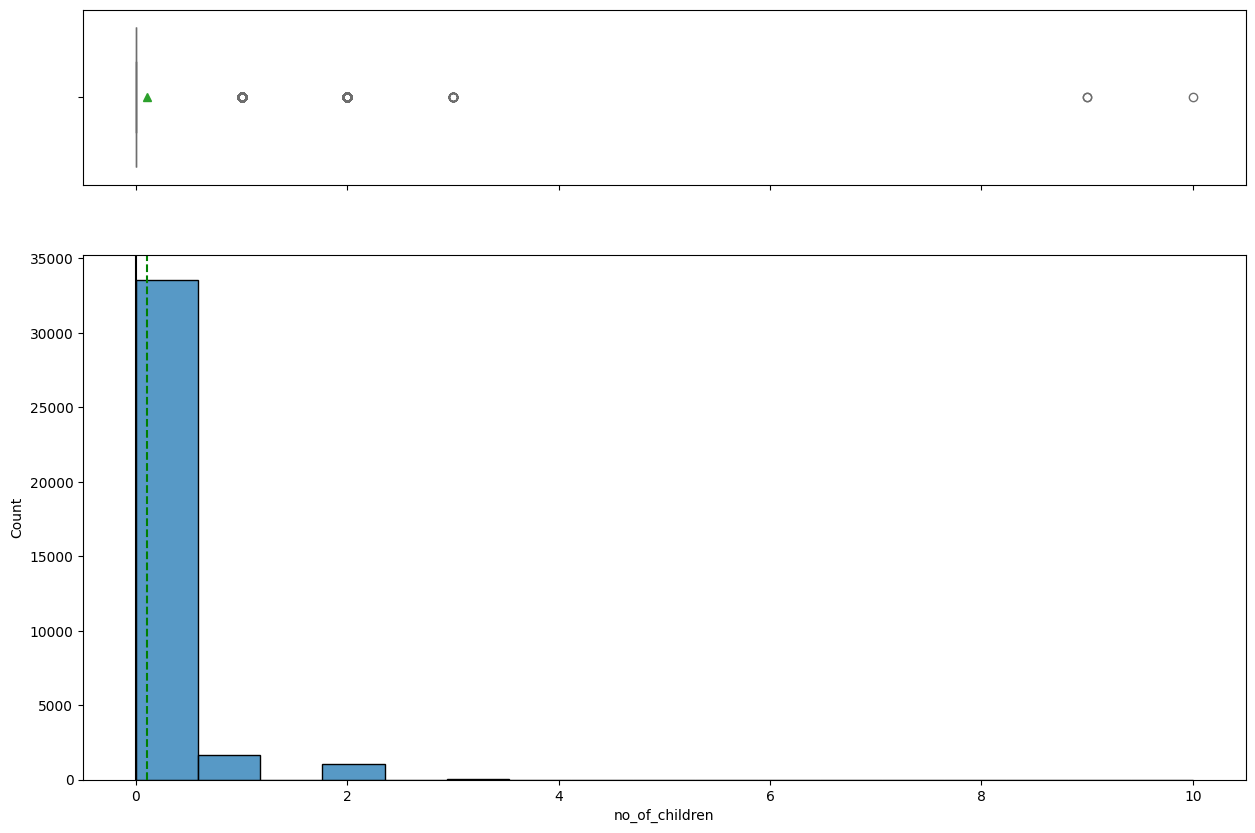

In [ ]:
histogram_boxplot(data, numerical_features[1])

**Observations:**

- most of them came with 0 children

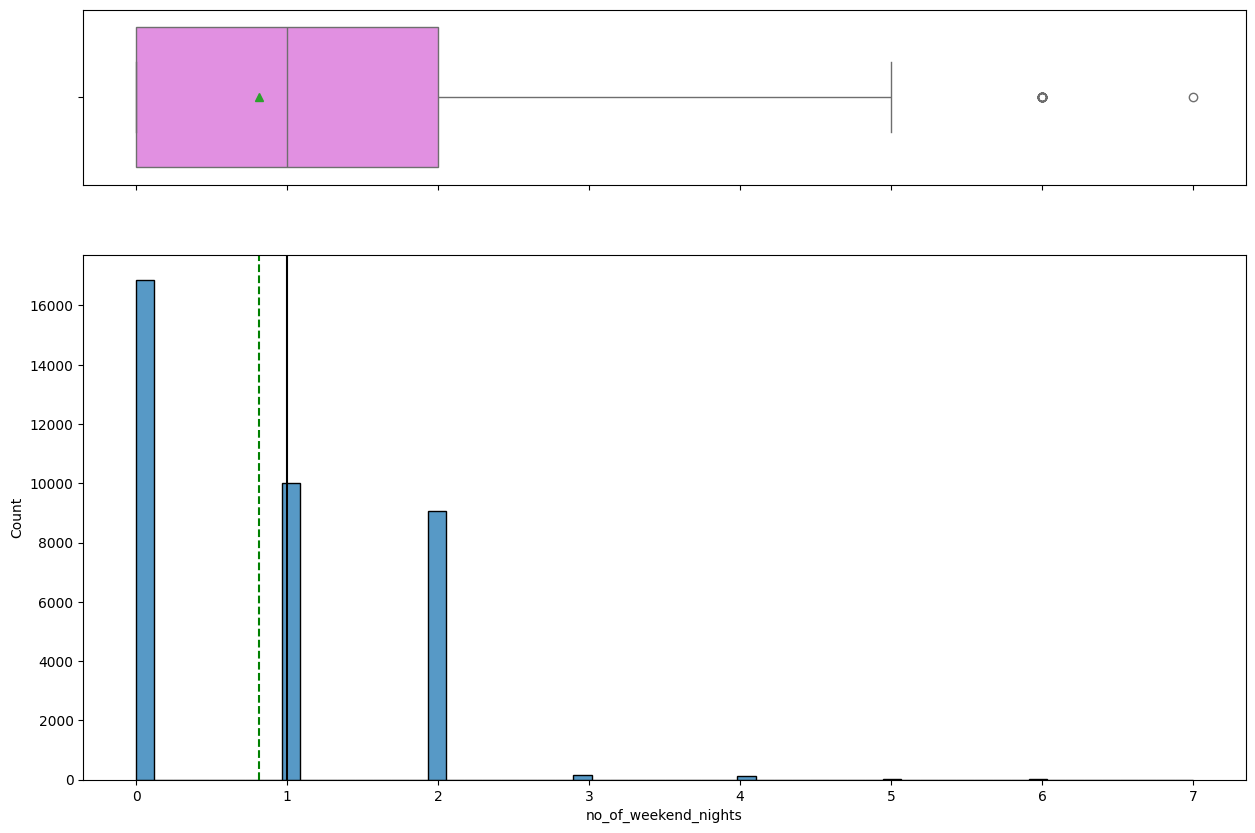

In [ ]:
histogram_boxplot(data, numerical_features[2])

**Observations:**

- most of them didnt book a weekends night

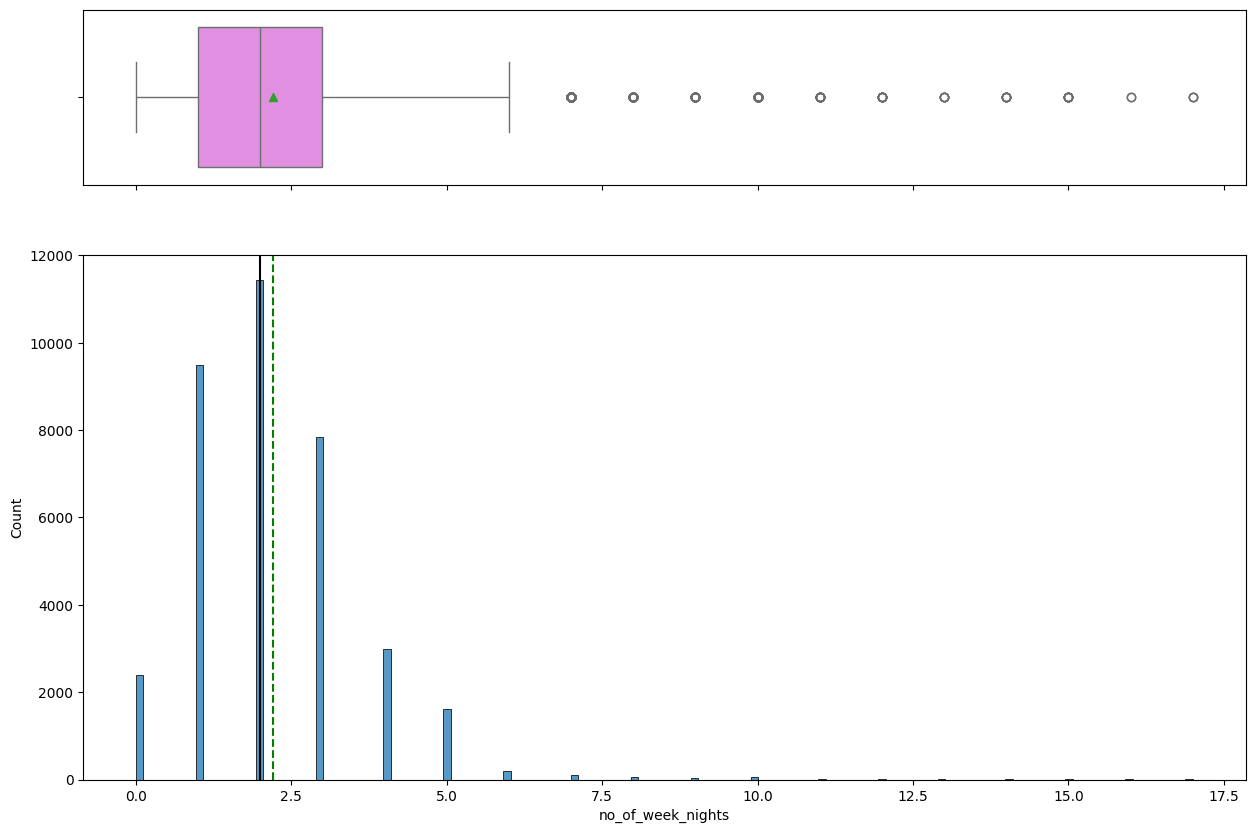

In [ ]:
histogram_boxplot(data, numerical_features[3])

**Observations:**

- most of them book 2 weeknights

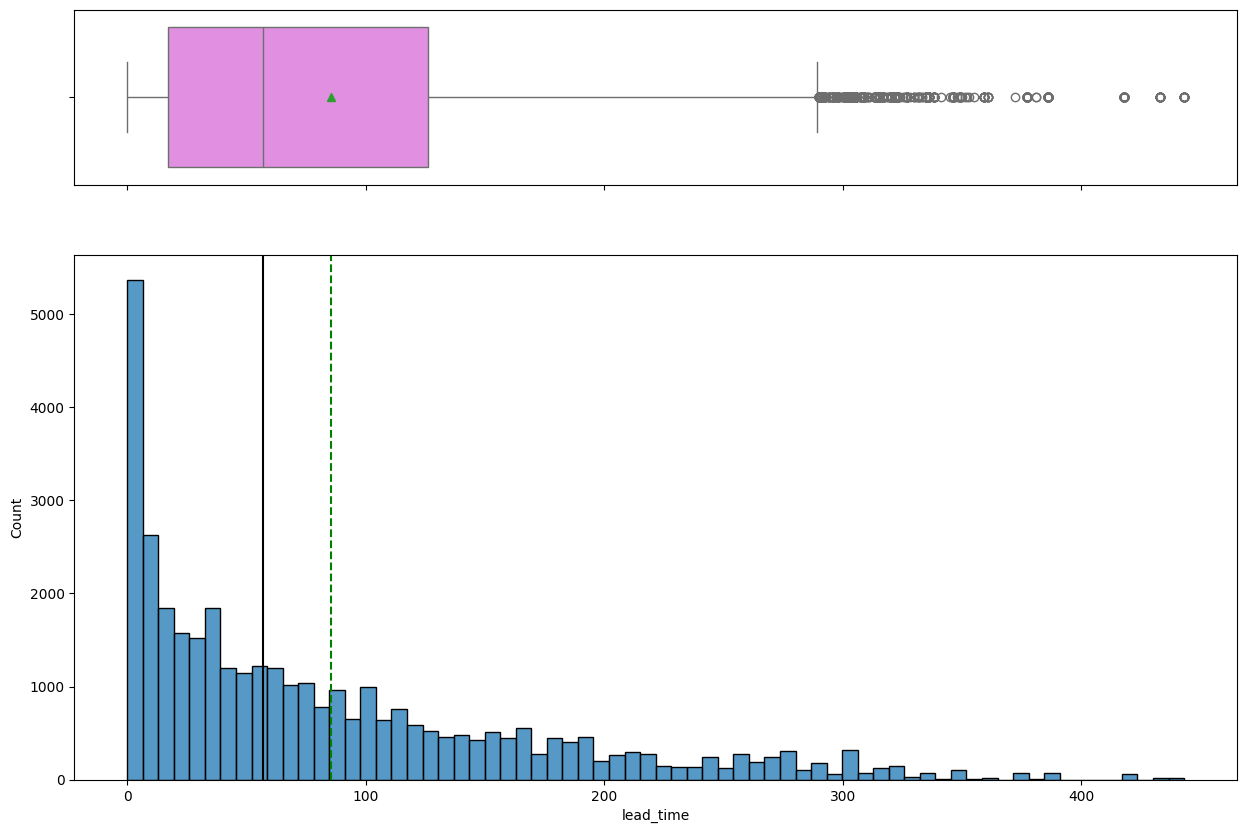

In [ ]:
histogram_boxplot(data, numerical_features[4])

**Observations:**

- most of them book befor a few days and the avg is between 60 - 80

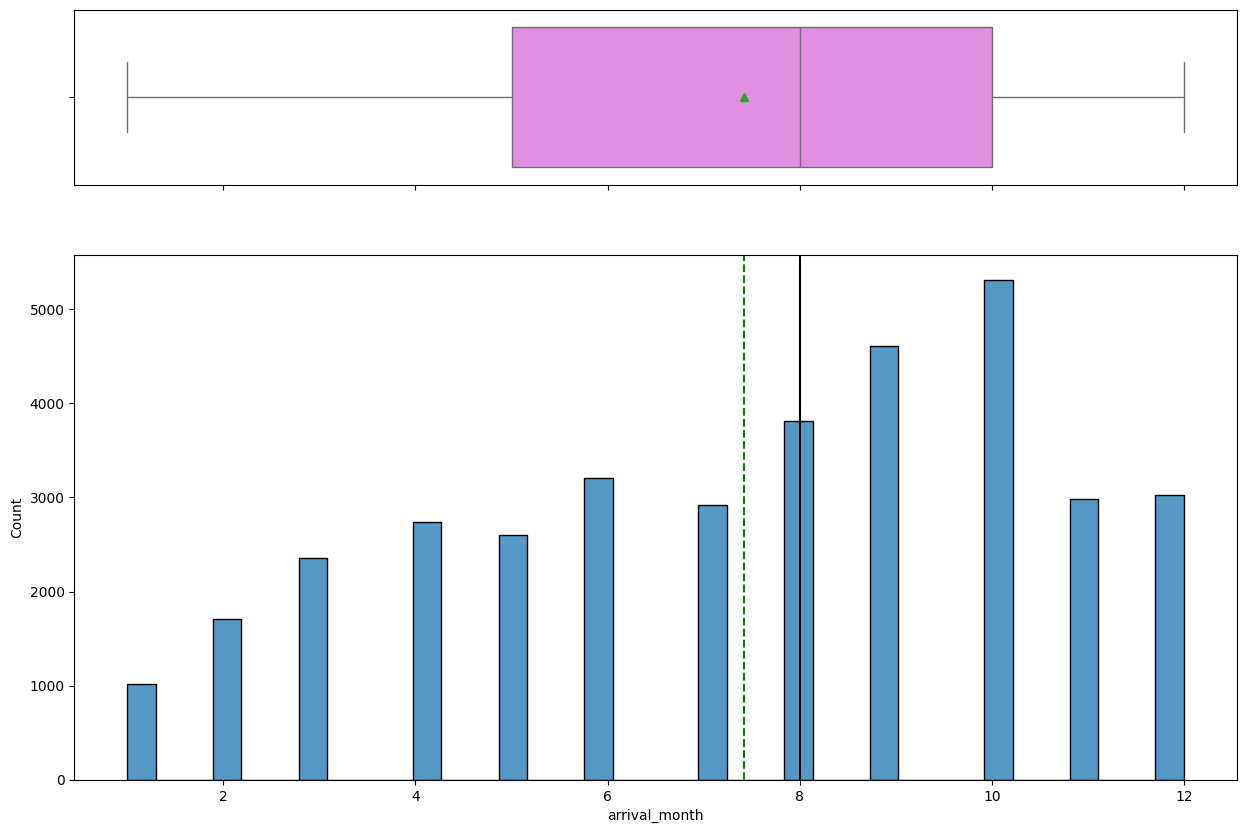

In [ ]:
histogram_boxplot(data, numerical_features[6])

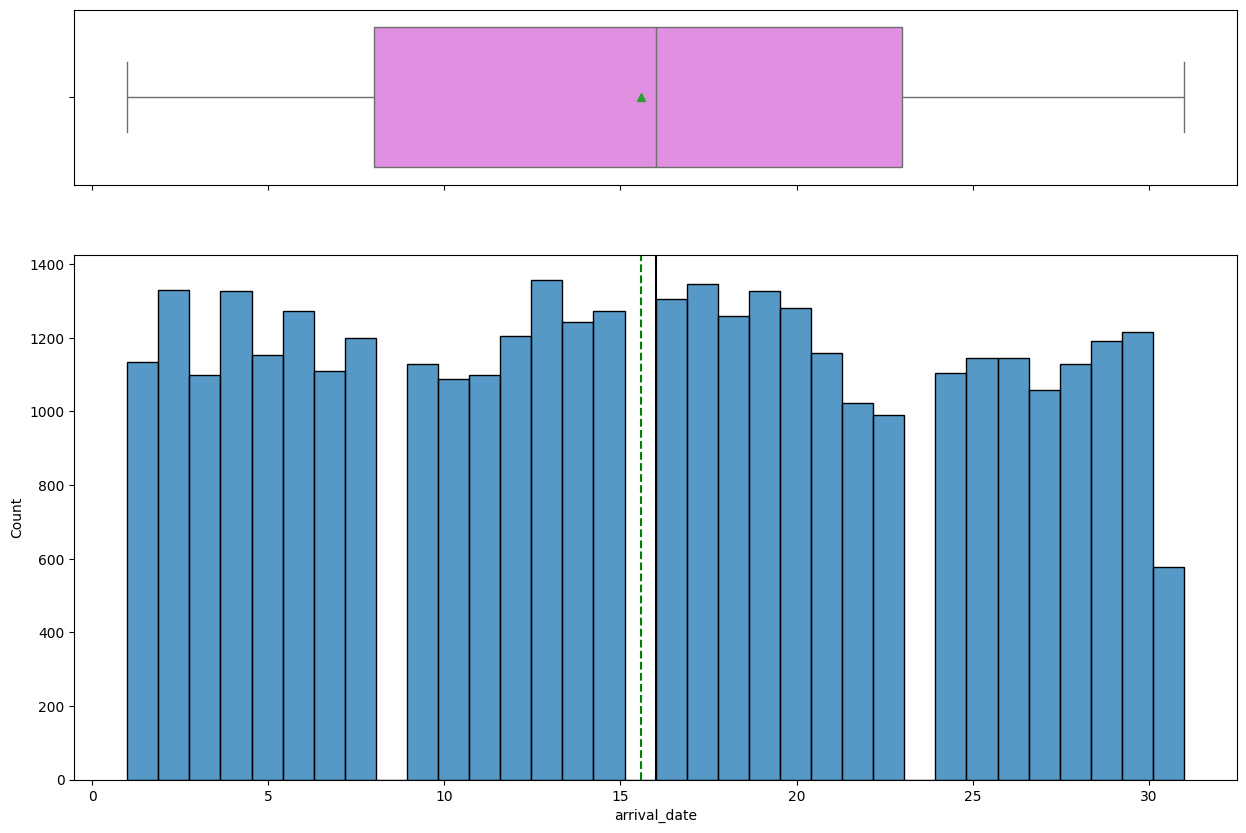

In [ ]:
histogram_boxplot(data, numerical_features[7])

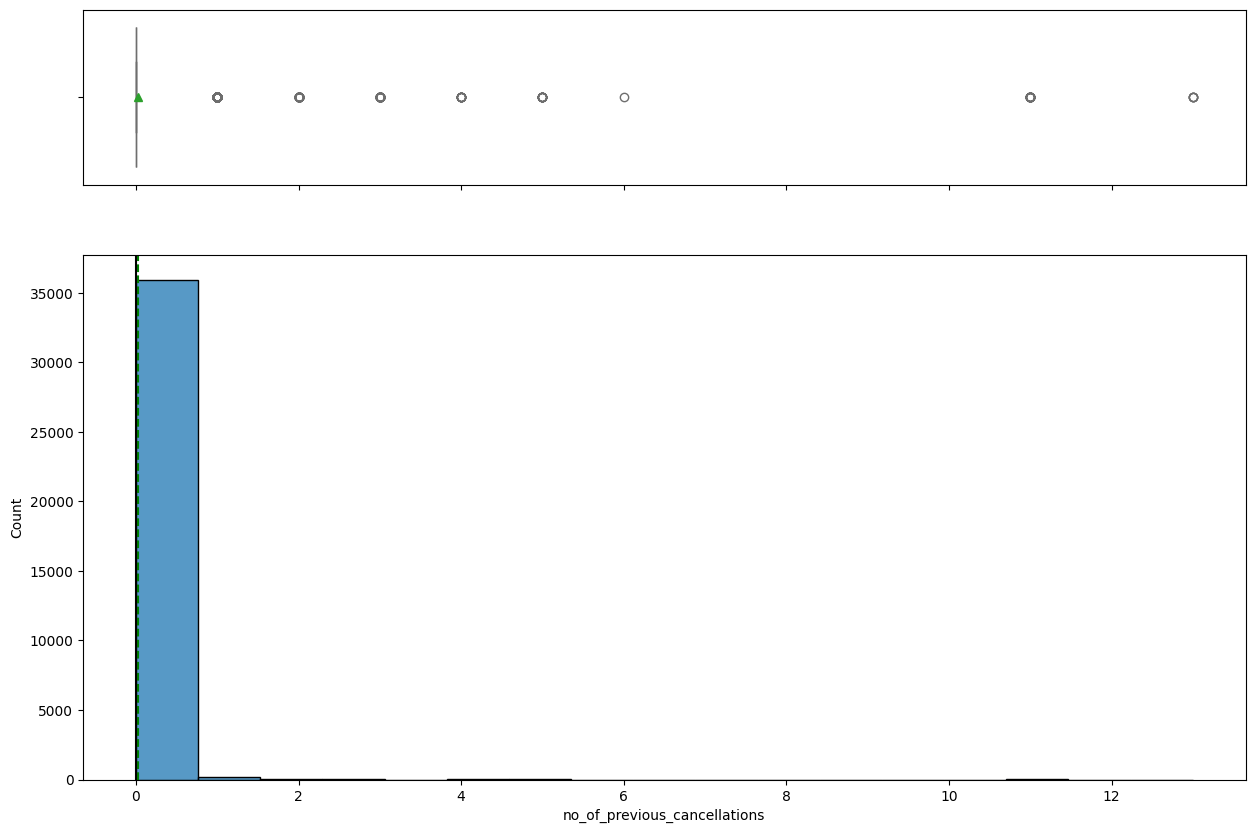

In [ ]:
histogram_boxplot(data, numerical_features[8])

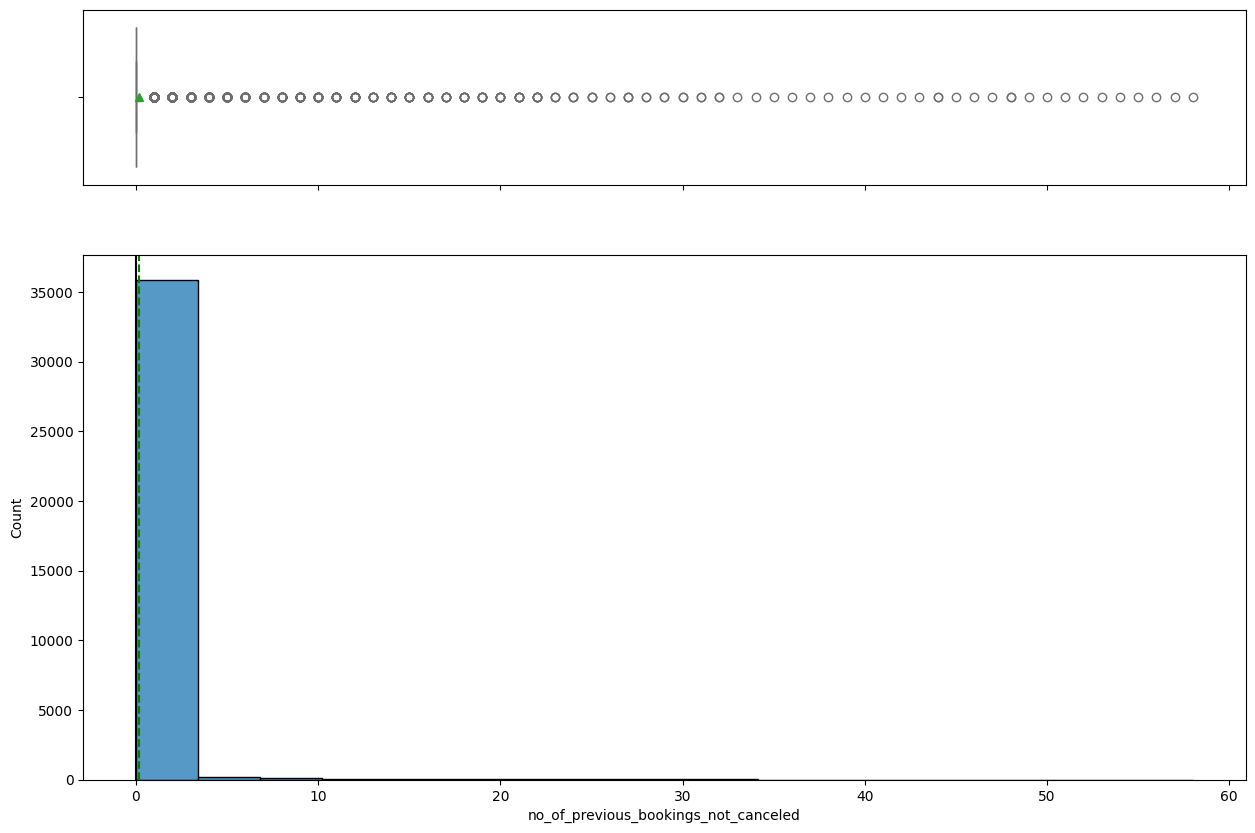

In [ ]:
histogram_boxplot(data, numerical_features[9])

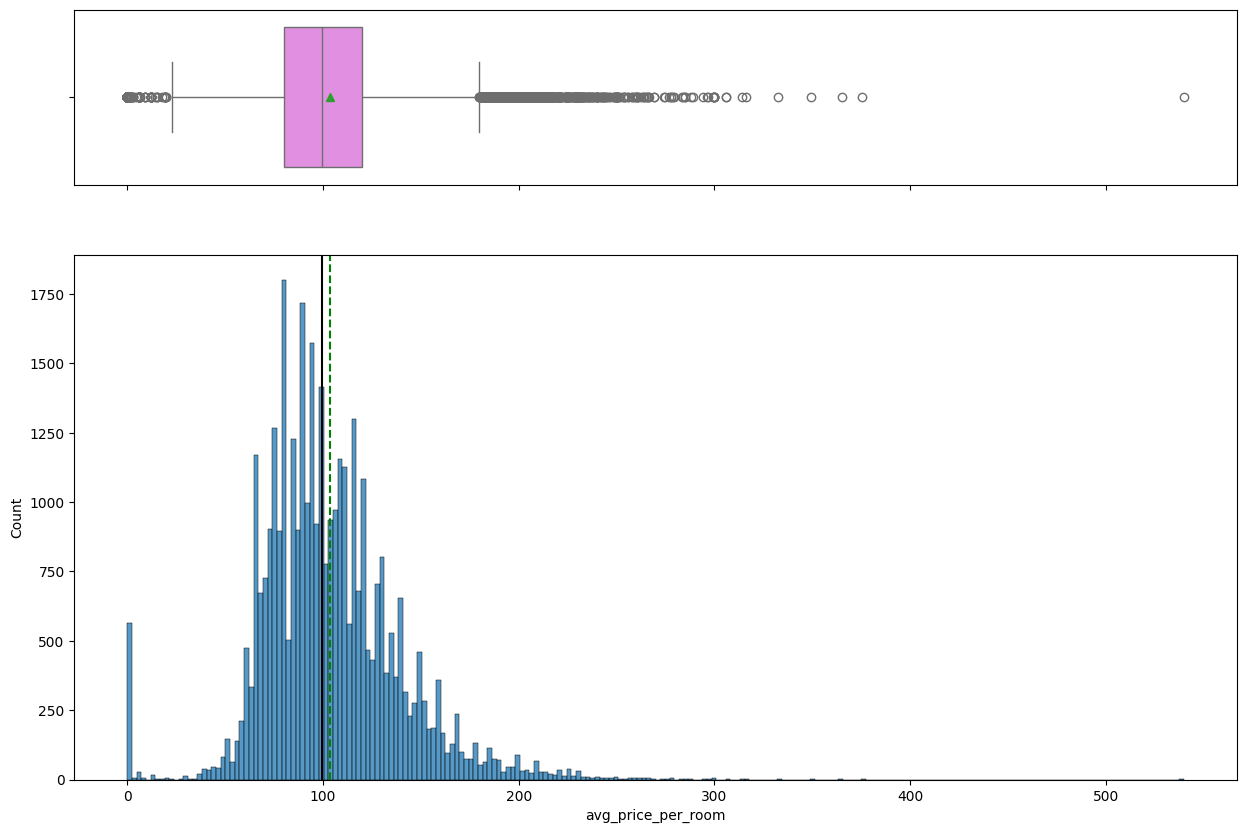

In [ ]:
histogram_boxplot(data, numerical_features[10])

**Observations:**

- the avg is 100 per room

- also normal

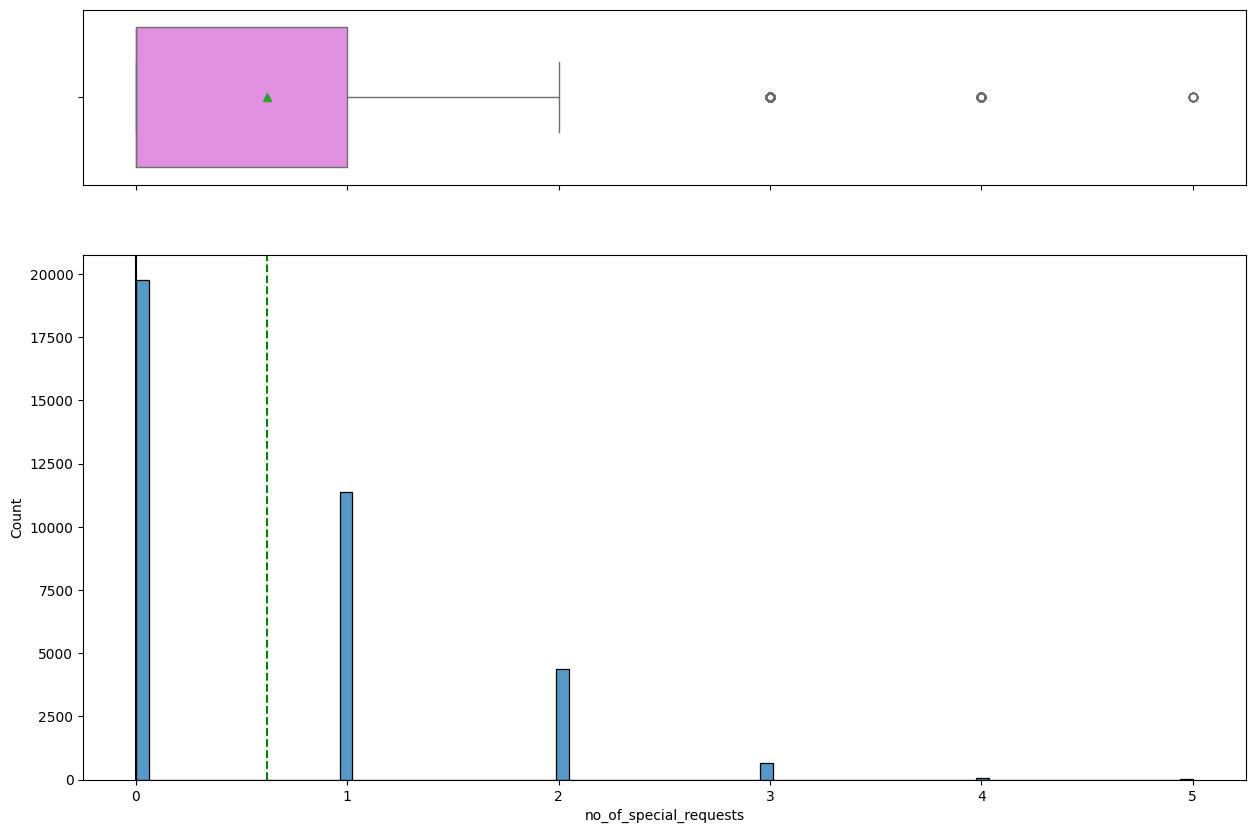

In [ ]:
histogram_boxplot(data, numerical_features[11])

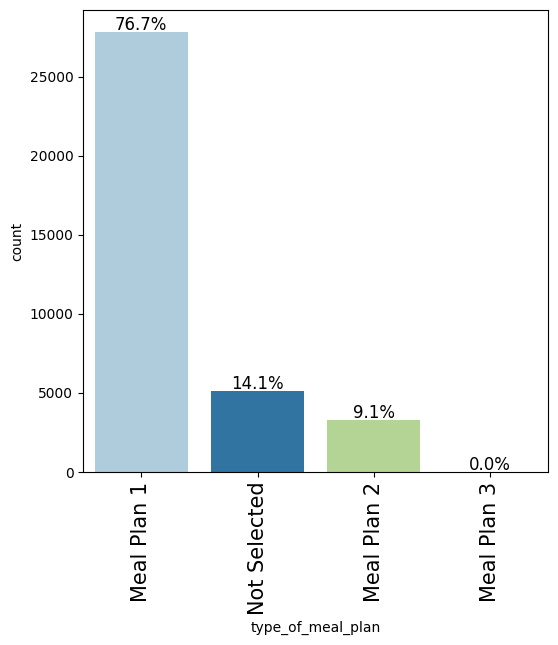

In [ ]:
labeled_barplot(data, categorical_features[0], perc=True)

**Observations:**

- most of them choose plan 1

- the plan 3 it seems not prefered

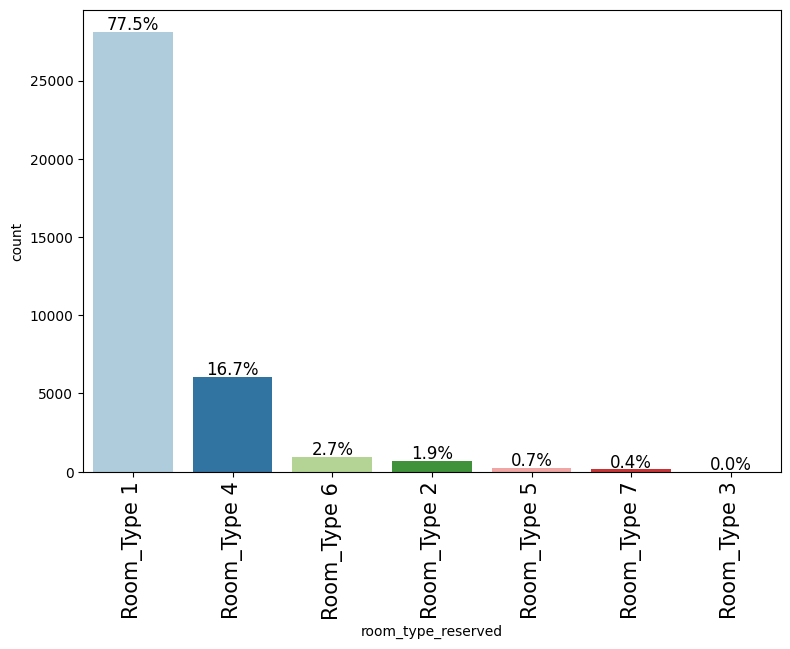

In [ ]:
labeled_barplot(data, categorical_features[1], perc=True)

**Observations:**

- the type 1 it look a standard room and its the prefered choice

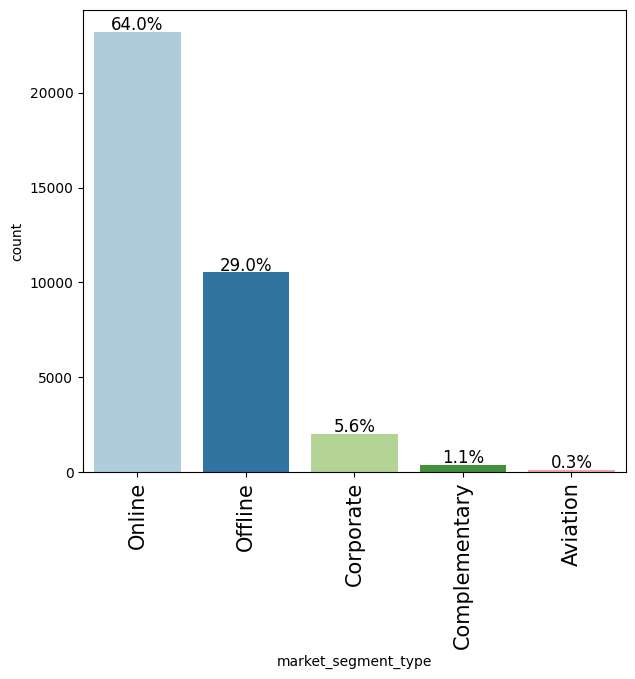

In [ ]:
labeled_barplot(data, categorical_features[2], perc=True)

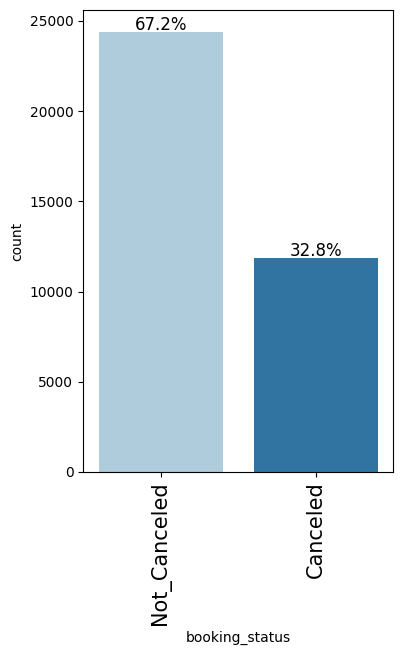

In [ ]:
labeled_barplot(data, categorical_features[3], perc=True)

**Observations:**

- the problem is that the third is canceled

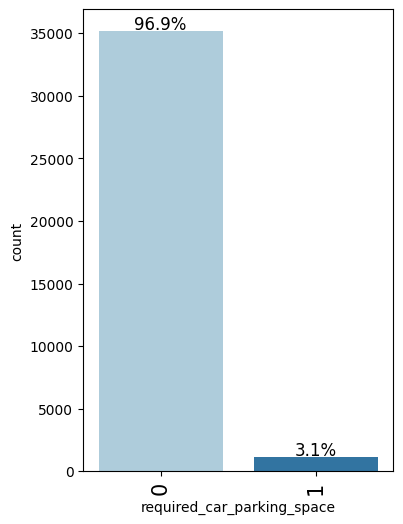

In [ ]:
labeled_barplot(data, categorical_features[4], perc=True)

**Observations:**

- most of them didnt want a parking

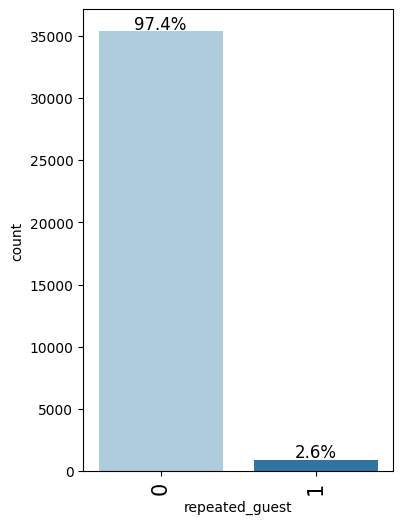

In [ ]:
labeled_barplot(data, categorical_features[5], perc=True)

**Observations:**

- 97% (majorty of them) are new guest

###Bivariate Analysis

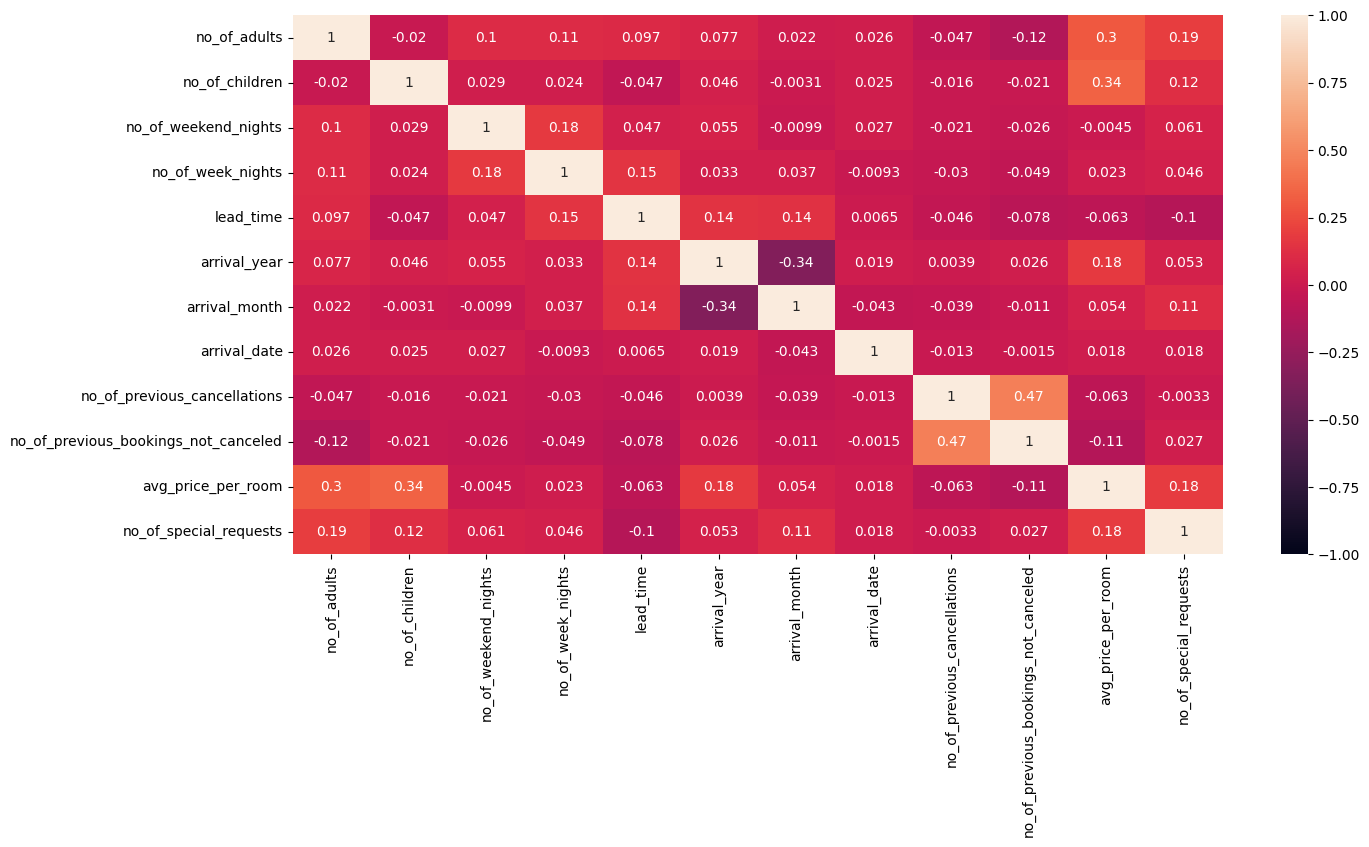

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[numerical_features].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

**Observations:**

- there is no strong correlation only between not canceled and canceled and this due to the oppsites

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


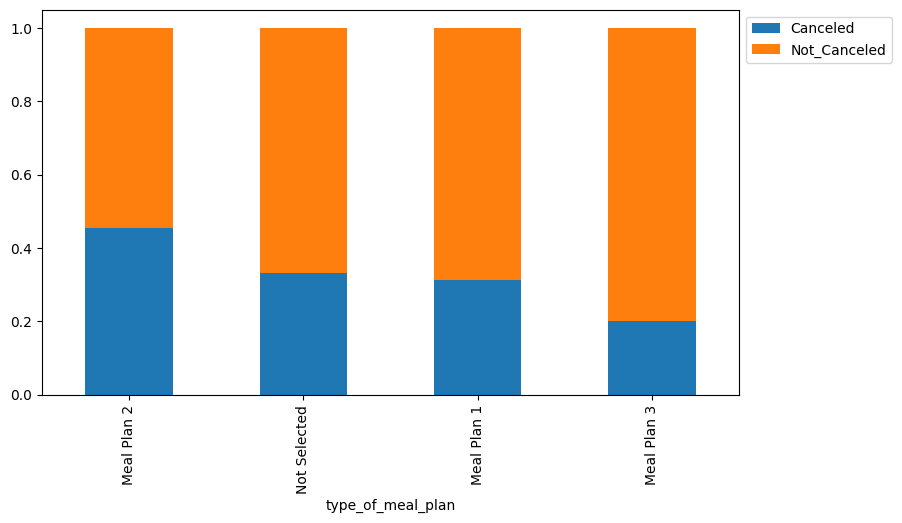

In [ ]:
stacked_barplot(data, predictor=categorical_features[0], target='booking_status')

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


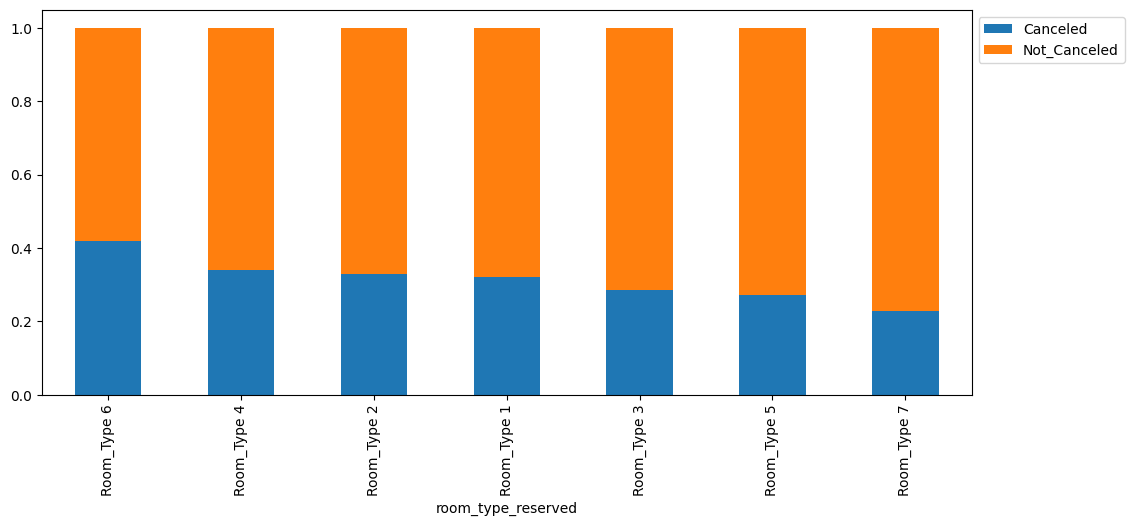

In [ ]:
stacked_barplot(data, predictor=categorical_features[1], target='booking_status')

**Observations:**

- room type does not appear to have a direct, strong impact on booking cancellations

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


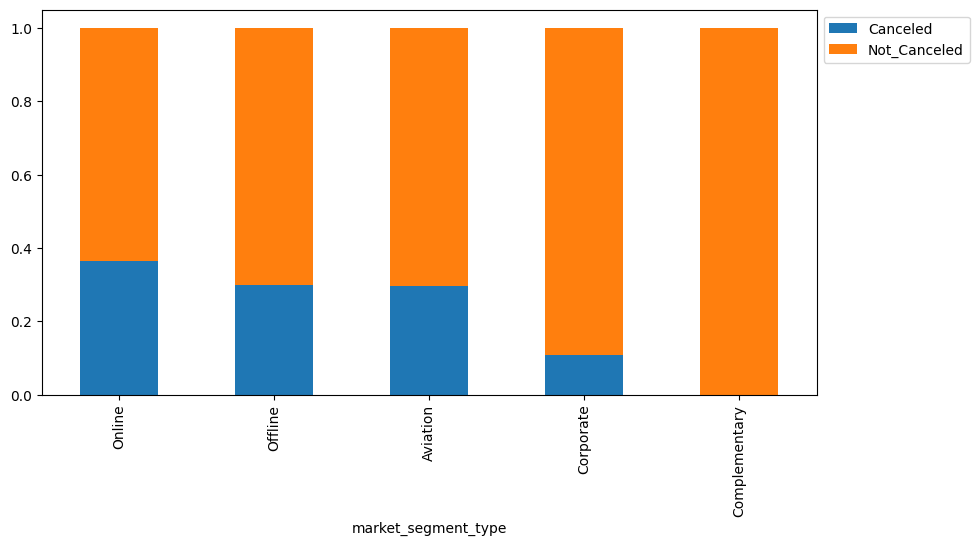

In [ ]:
stacked_barplot(data, predictor=categorical_features[2], target='booking_status')

**Observations:**

- is seem the market segment complementary that the most canceled

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


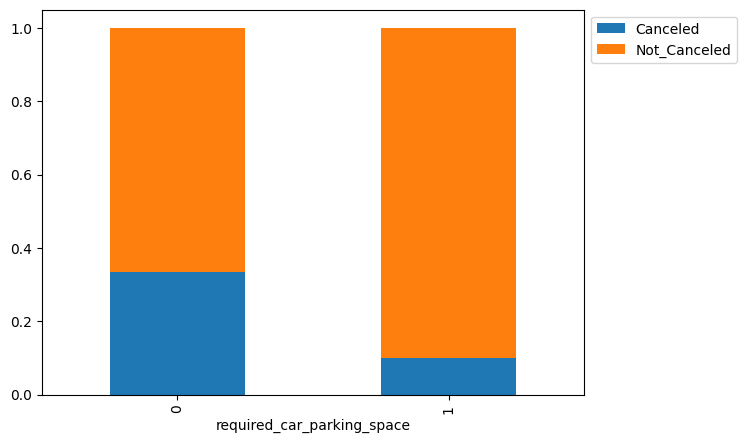

In [ ]:
stacked_barplot(data, predictor=categorical_features[4], target='booking_status')

**Observations:**

- the vistor if he ask for parking it seems that he will not cancele

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


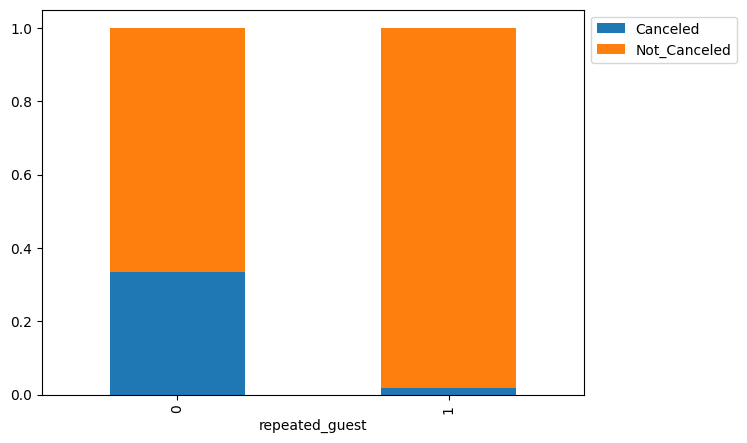

In [ ]:
stacked_barplot(data, predictor=categorical_features[5], target='booking_status')

**Observations:**

- also here the repeated guest have a high chance not canceling

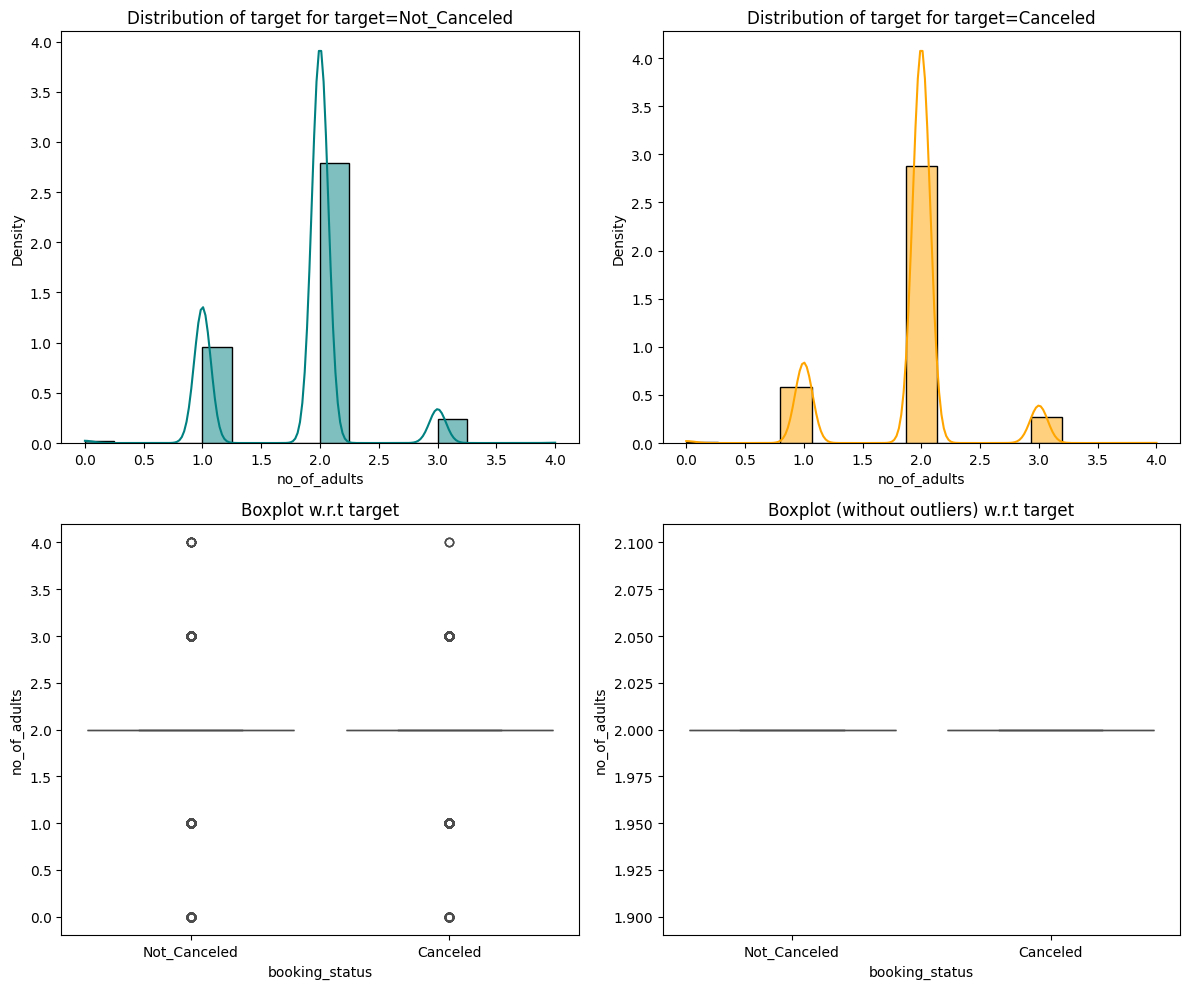

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[0], target='booking_status')

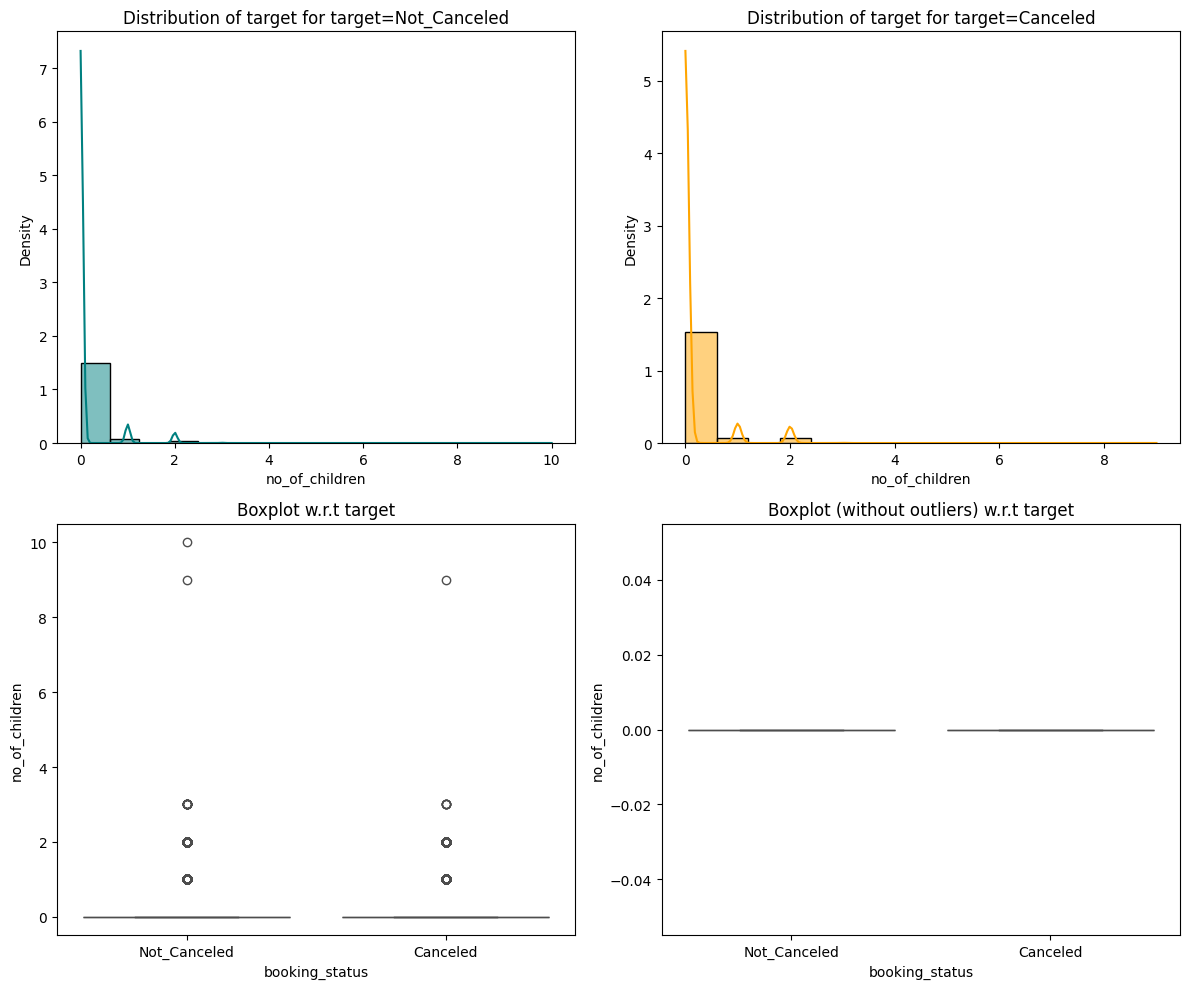

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[1], target='booking_status')

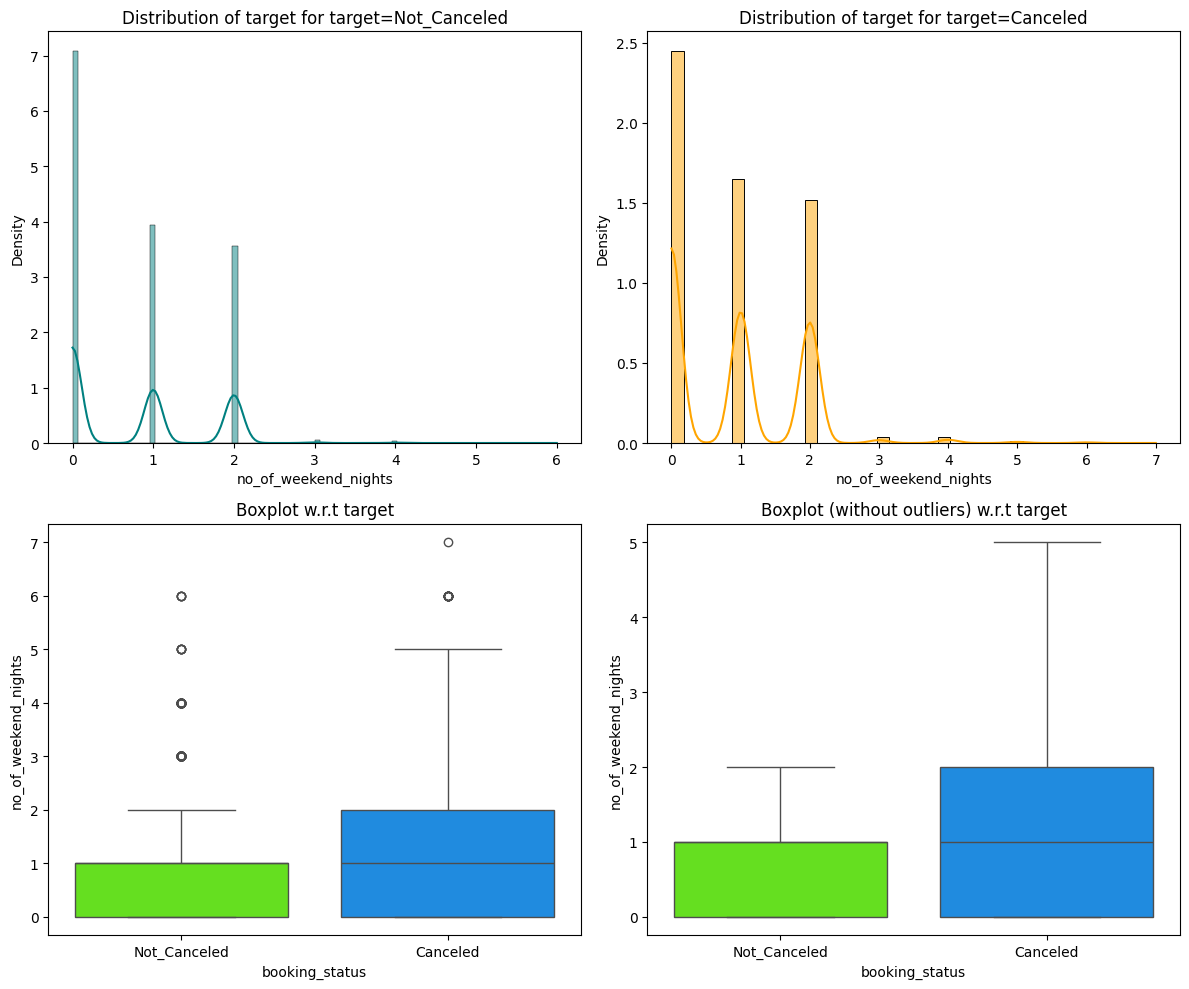

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[2], target='booking_status')

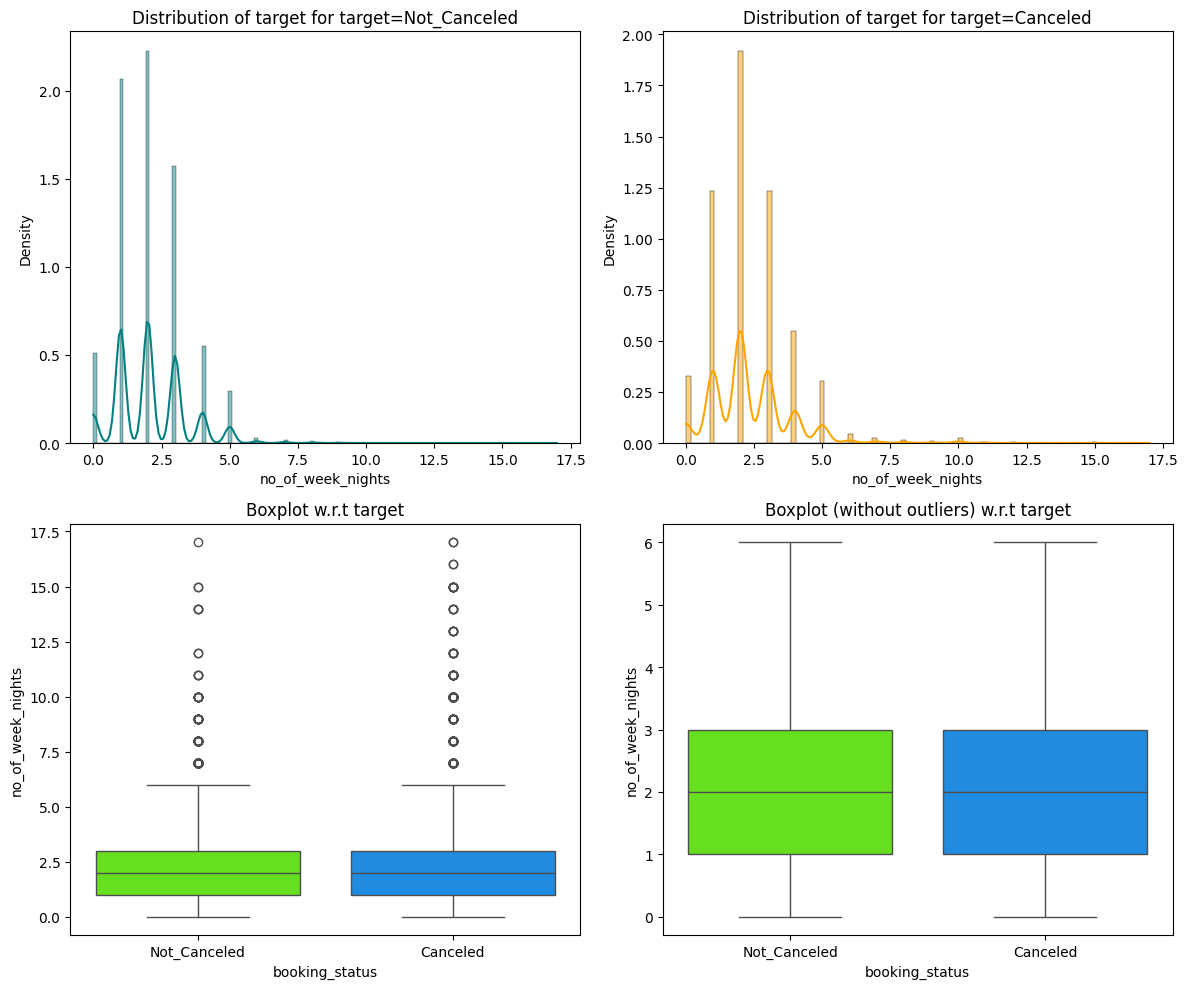

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[3], target='booking_status')

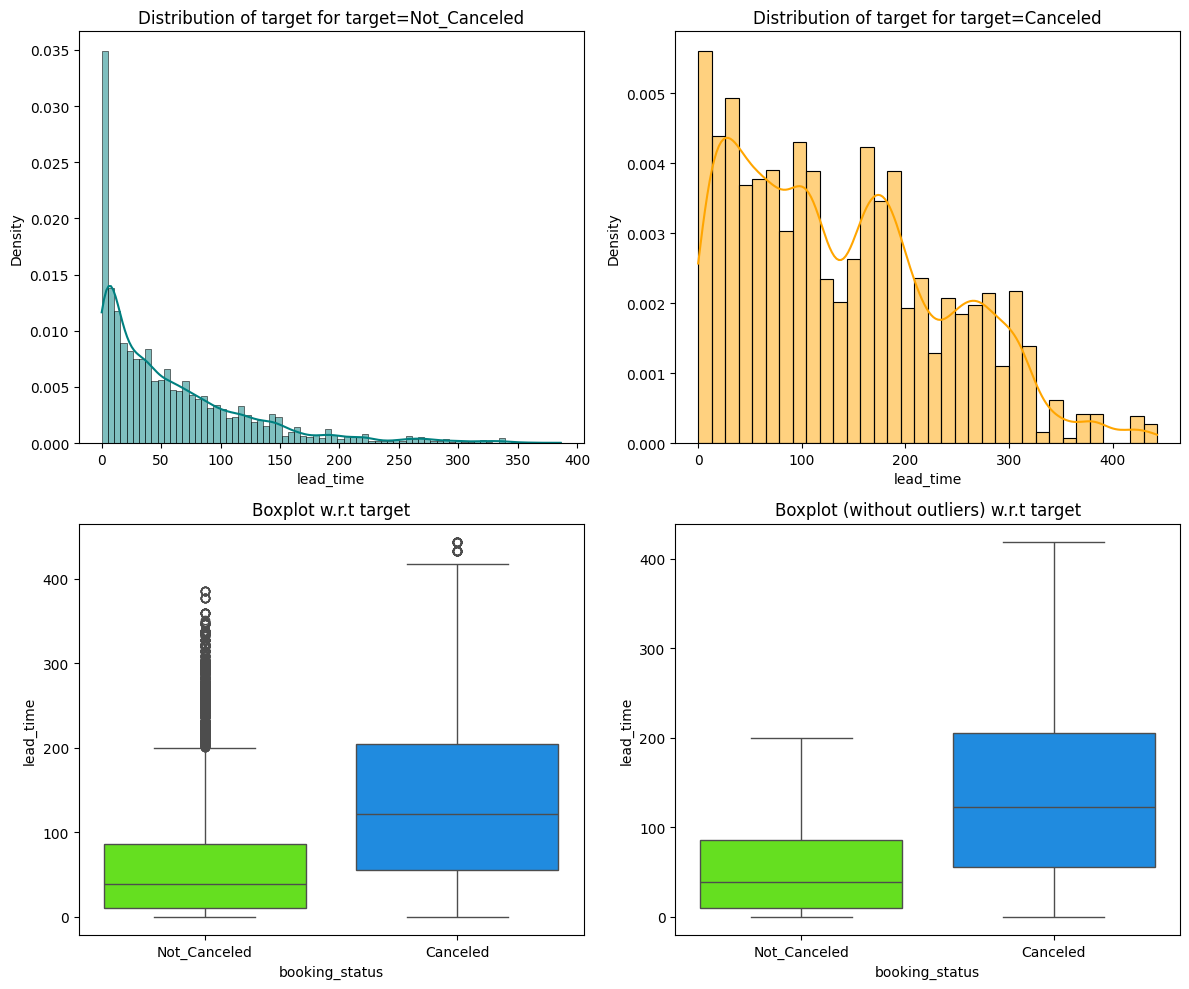

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[4], target='booking_status')

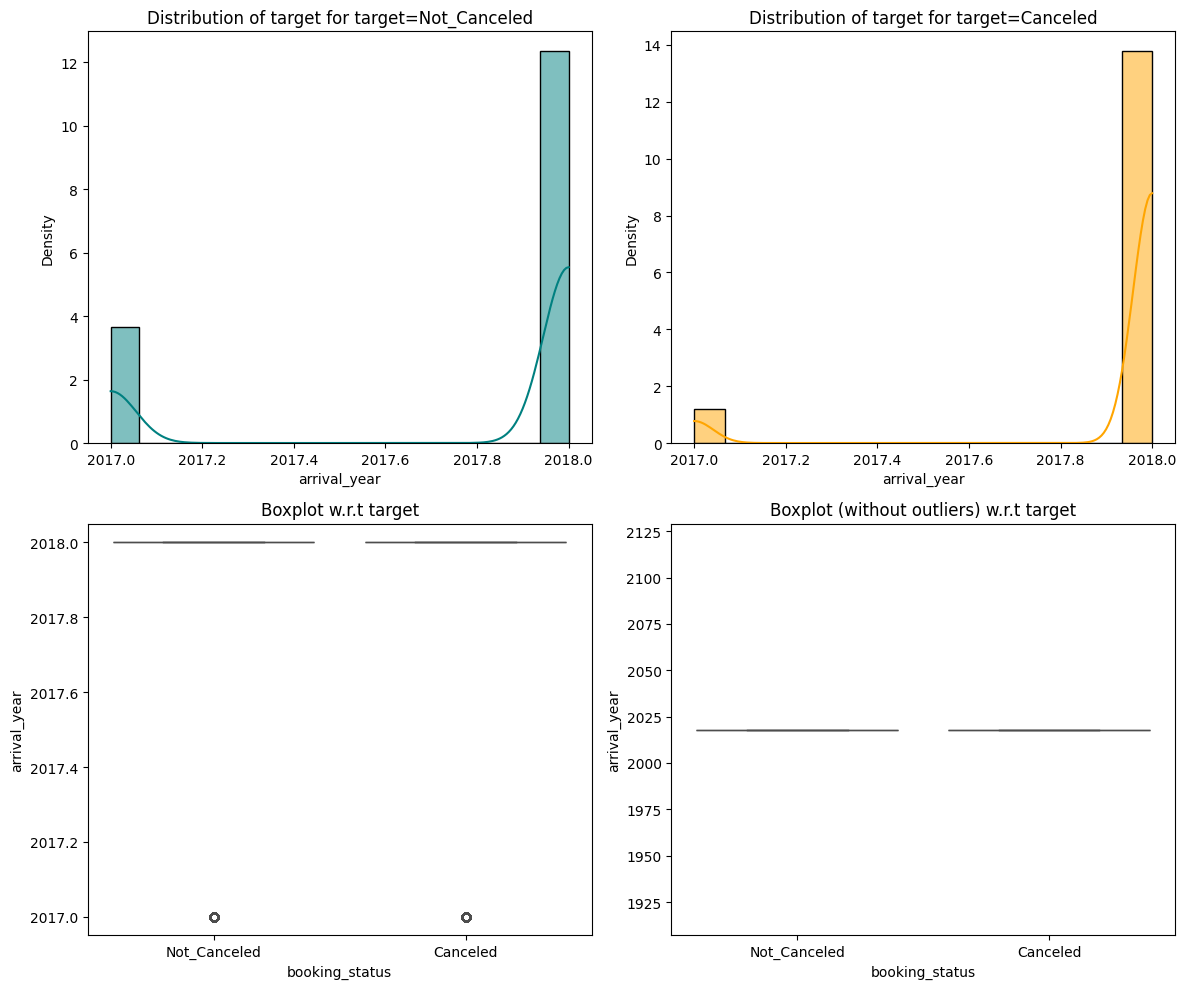

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[5], target='booking_status')

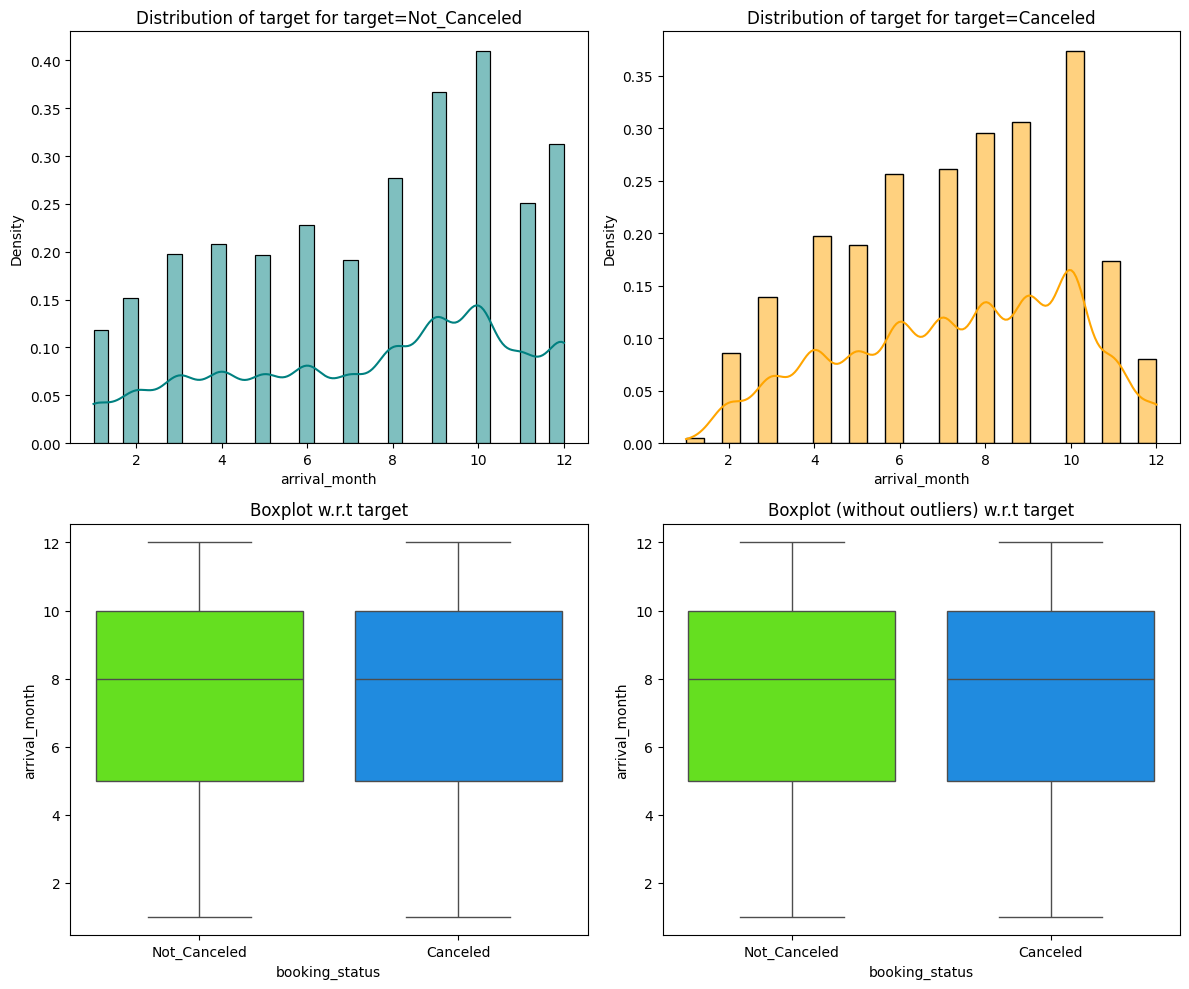

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[6], target='booking_status')

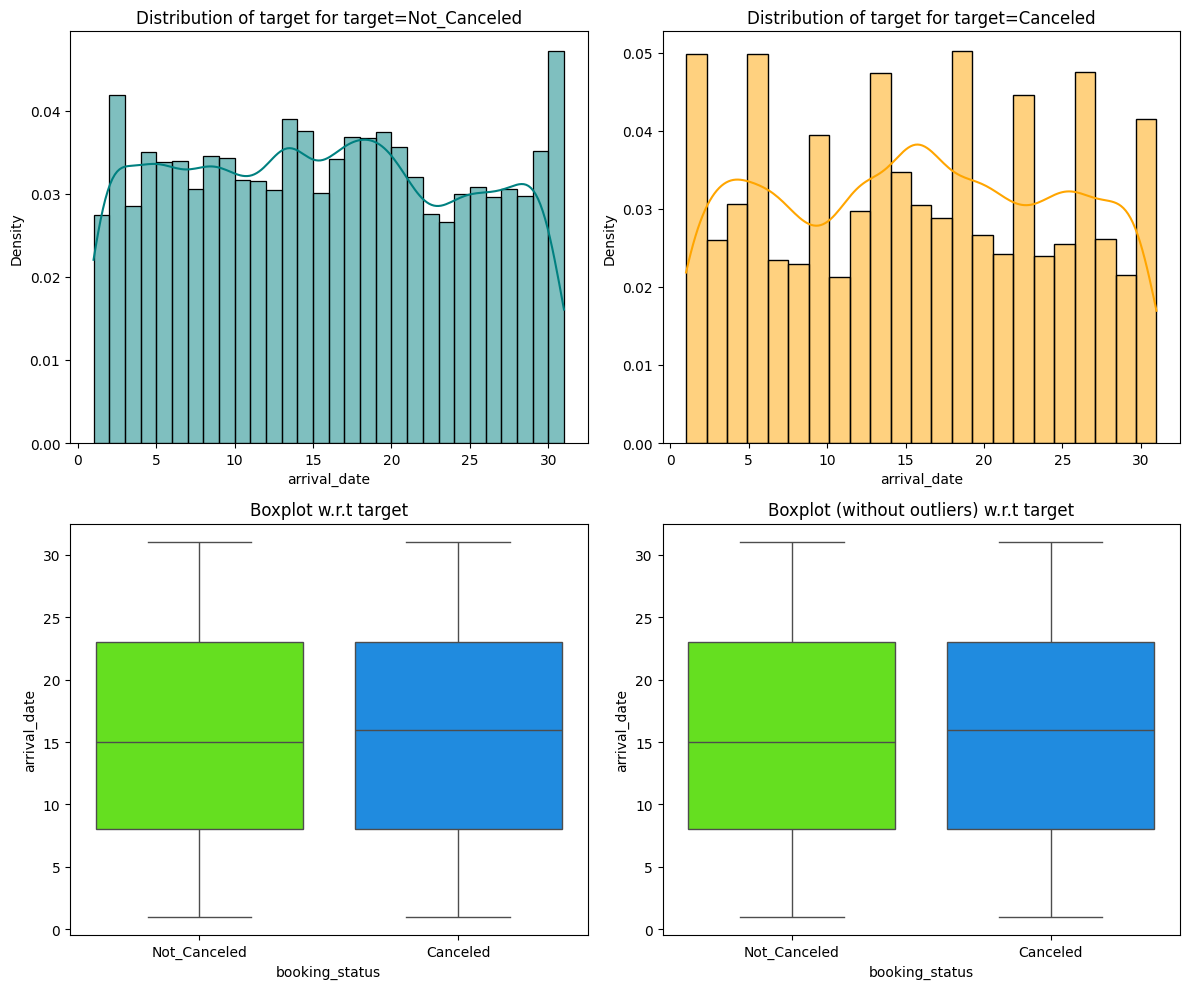

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[7], target='booking_status')

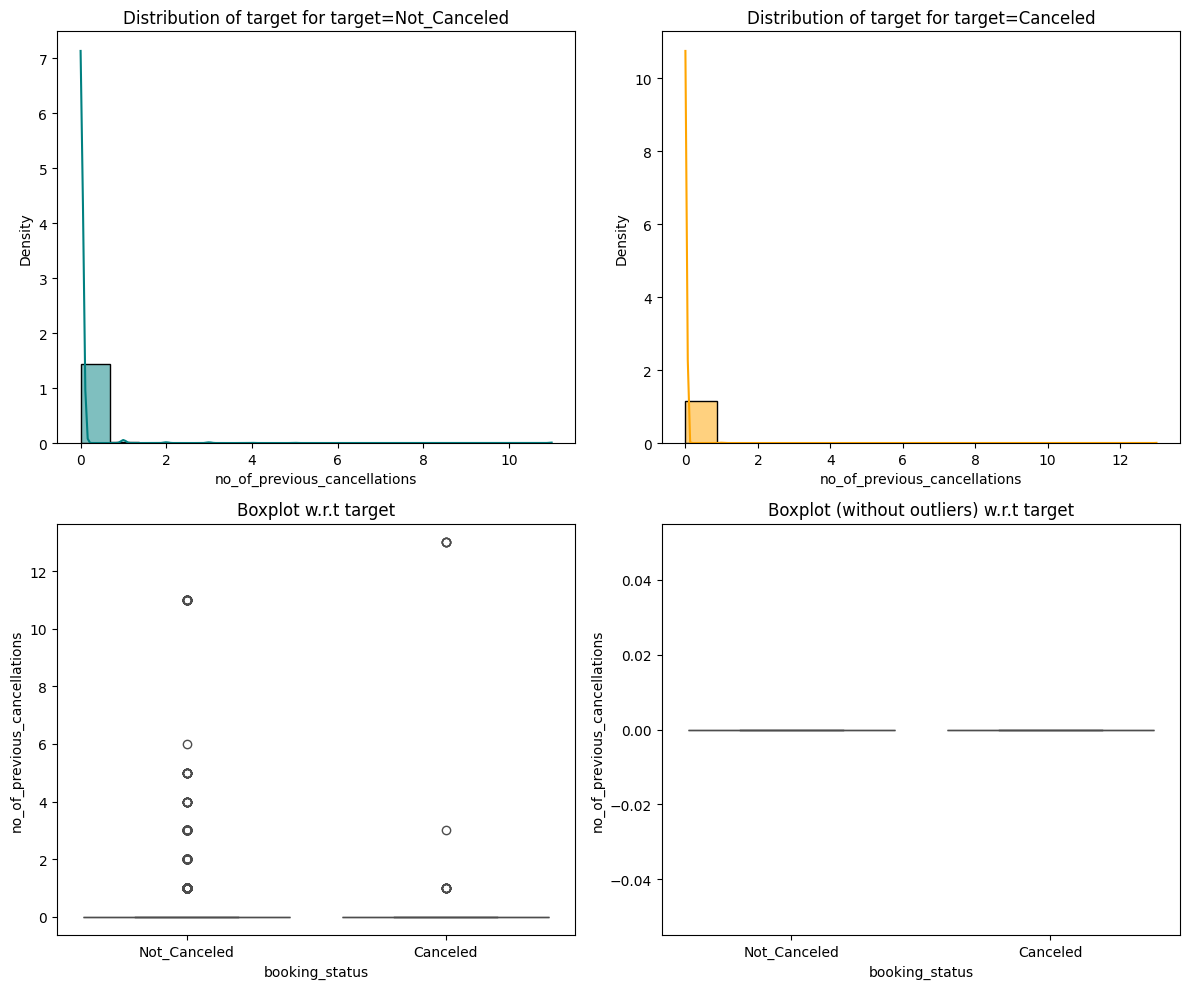

In [ ]:
distribution_plot_wrt_target(data, predictor= numerical_features[8], target='booking_status')

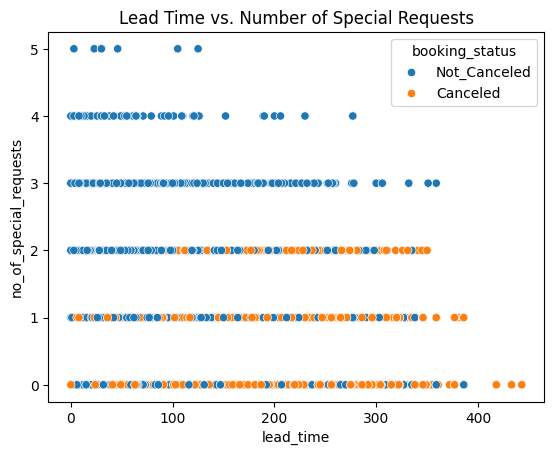

In [ ]:
sns.scatterplot(x='lead_time', y='no_of_special_requests', hue='booking_status', data=data)
plt.title("Lead Time vs. Number of Special Requests")
plt.show()


**Observations:**

- the more specaial requests the more chance not cancele

## Data Preprocessing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

###Outliers

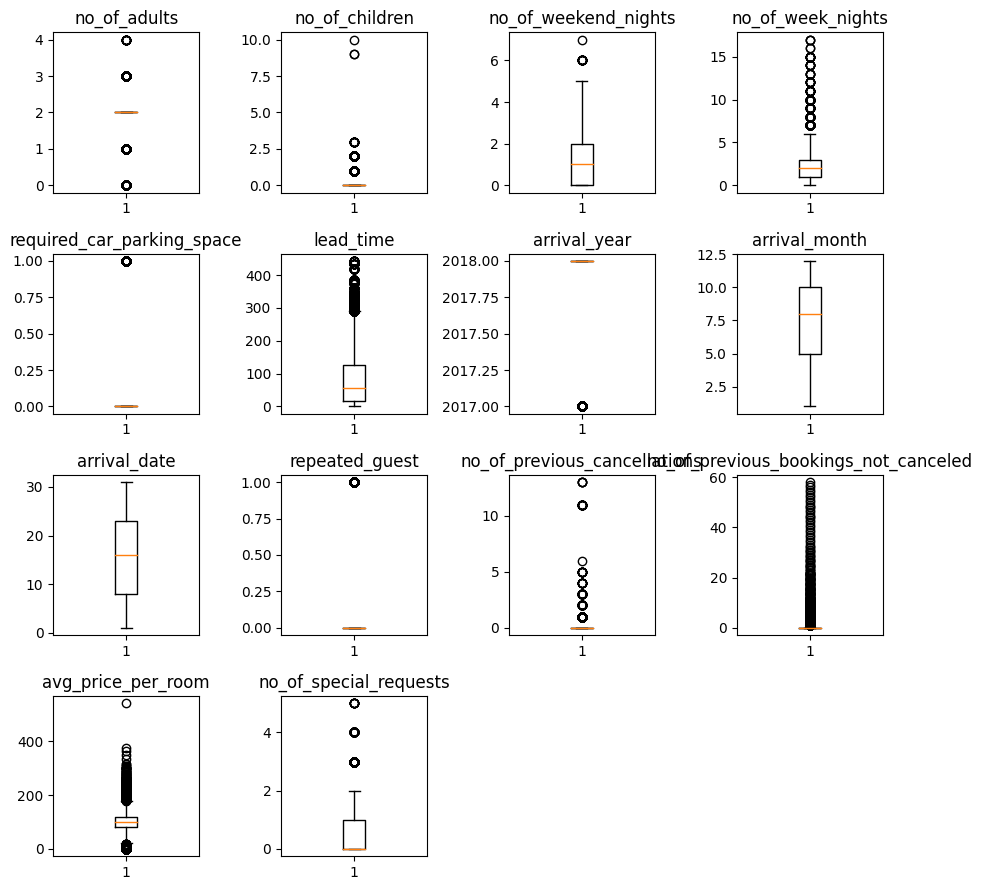

In [ ]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(9, 9))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- there is an outliers in the avg price

In [ ]:
df = data.copy()
df['avg_price_per_room'] = df['avg_price_per_room'].apply(lambda x: 400 if x > 400 else x)


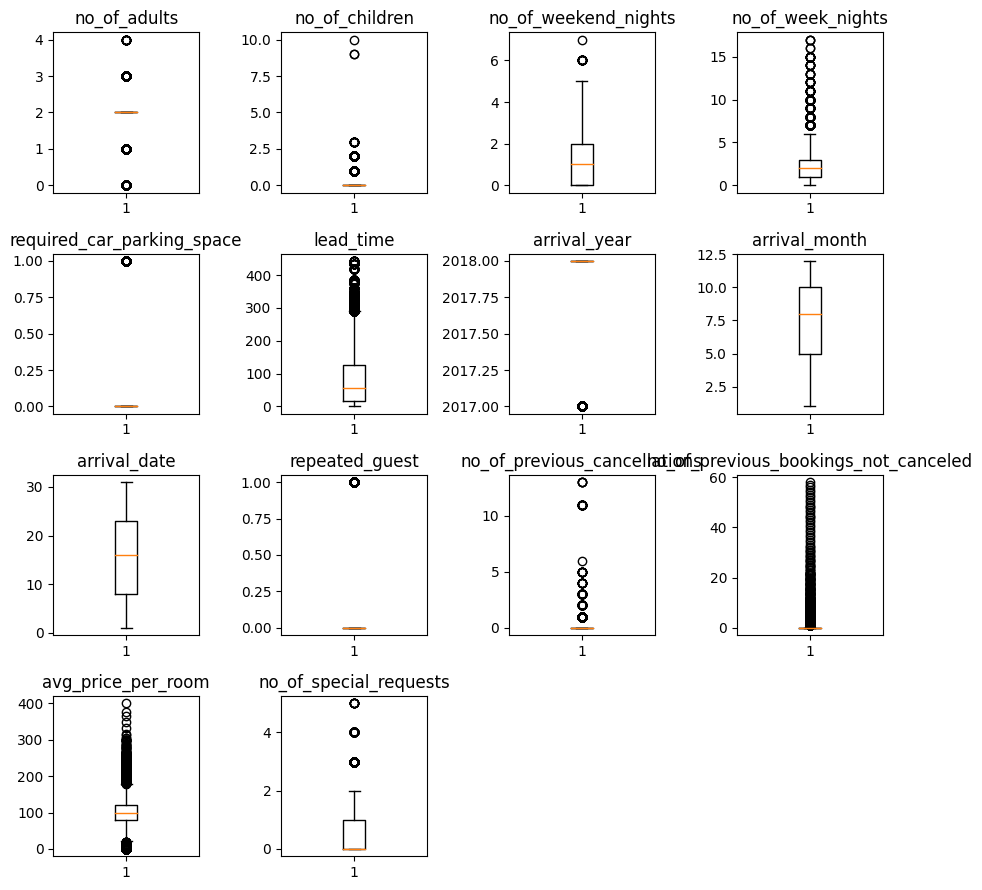

In [ ]:
plt.figure(figsize=(9, 9))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### EDA

- It is a good idea to explore the data once again after manipulating it.

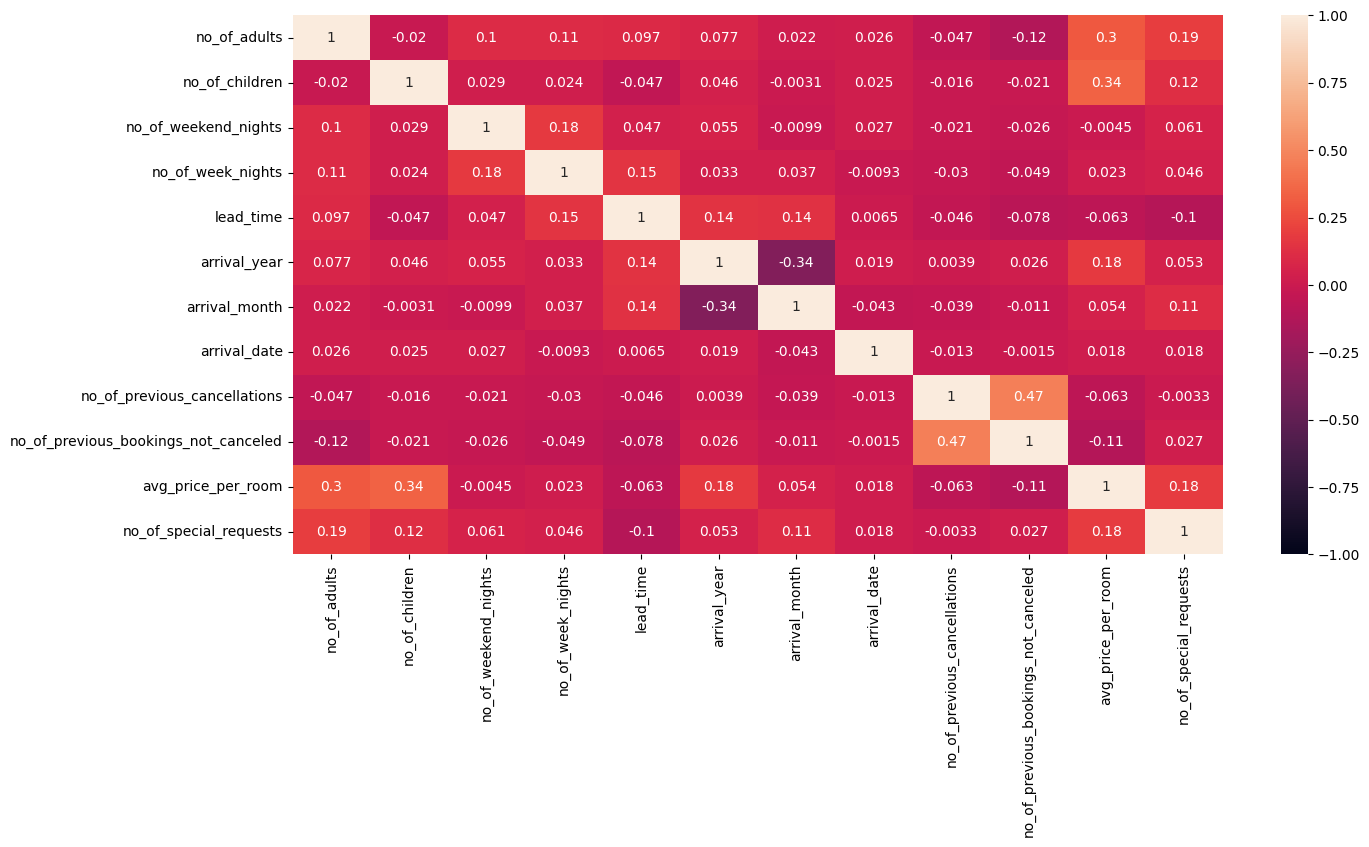

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[numerical_features].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

###Preparing

In [ ]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)


In [ ]:
print(df['booking_status'].value_counts())
print(df['booking_status'].value_counts(1)*100)

booking_status
0    24390
1    11885
Name: count, dtype: int64
booking_status
0   67.23639
1   32.76361
Name: proportion, dtype: float64


**Observations:**

- converting the target var to binary

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [ ]:
X = df.drop(["booking_status"], axis=1)
Y = df['booking_status']

# Create dummy variables first
X = pd.get_dummies(X, drop_first=True)

# Then add a constant to the independent variables
X = sm.add_constant(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

# Verify shapes and feature columns
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)
X_train.head()

Training set shape:  (25392, 28)
Testing set shape:  (10883, 28)


const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662 1.00000             1               0                     0   
26641 1.00000             2               0                     0   
17835 1.00000             2               0                     2   
21485 1.00000             2               0                     0   
5670  1.00000             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  repeated_guest  \
13662             10            15               0   
26641              3            31               0   
17835             10            14               0   
21485              6            29               0   
5670               8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662           115.00000                       0   
26641            78.15000                       1   
17835            78.00000                       1   
21485            85.50000                       0   
5670            151.00000                       0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                          False                          False   
26641                          False                          False   
17835                          False                          False   
21485                          False                          False   
5670                           False                          False   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                           False                           False   
26641                           False                            True   
17835                           False                           False   
21485                            True                           False   
5670                            False                           False   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                           False                           False   
26641                           False                           False   
17835                           False                           False   
21485                           False                           False   
5670                            False                           False   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                           False                           False   
26641                           False                           False   
17835                           False                           False   
21485                           False                           False   
5670                            False                           False   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                           False                              False   
26641                           False                              False   
17835                      

**Observations:**

- split the data
- get dummies
- add a constant

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
X_train = X_train.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                  39481457.59205
no_of_adults                                  1.34837
no_of_children                                1.97844
no_of_weekend_nights                          1.06950
no_of_week_nights                             1.09568
required_car_parking_space                    1.03995
lead_time                                     1.39509
arrival_year                                  1.43131
arrival_month                                 1.27602
arrival_date                                  1.00674
repeated_guest                                1.78357
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05786
no_of_special_requests                        1.24729
type_of_meal_plan_Meal Plan 2                 1.27257
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1.27238
room_type_rese

**Observations:**

- conveting the dummies var to 0 and 1 so we can get the VIF

- market_segment_type_Online very high vif so i will drop it

In [ ]:
X_train1 = X_train.drop(["market_segment_type_Online"], axis=1)

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                                  39404558.08449
no_of_adults                                  1.33200
no_of_children                                1.97756
no_of_weekend_nights                          1.06906
no_of_week_nights                             1.09513
required_car_parking_space                    1.03982
lead_time                                     1.39081
arrival_year                                  1.42886
arrival_month                                 1.27497
arrival_date                                  1.00672
repeated_guest                                1.78024
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.05702
no_of_special_requests                        1.24243
type_of_meal_plan_Meal Plan 2                 1.27222
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1.27058
room_type_rese

## Building a Logistic Regression model

In [ ]:
# fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 03 Oct 2024   Pseudo R-squ.:                  0.3292
Time:                        19:32:32   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.2087    120.654     -7.735      0.000   -1169.685    -696.732
no_of_adults                             0.1060      

**Observations:**

- Positive coefficient values indicate that as the value of the feature increases, the probability of a booking being canceled (booking_status = 1) increases.
- Lead Time (0.0157): As the lead time increases, the likelihood of a booking being canceled increases. This makes sense as longer lead times could increase the chance of plans changing, leading to cancellations.
- Number of Adults (0.1060) and Number of Children (0.1541): An increase in the number of adults or children in the booking increases the probability of cancellation. This could indicate that larger groups are more likely to cancel, possibly due to coordination difficulties.
- Number of Weekend Nights (0.1075) and Number of Week Nights (0.0405): As the number of nights (both weekend and week nights) increases, the likelihood of cancellation also increases, suggesting longer stays are more prone to cancellations.
- Type of Meal Plan Not Selected (0.2745): If no meal plan is selected, the probability of cancellation is higher. This could imply that customers who are unsure or have not committed to a meal plan might be more likely to cancel.
- Average Price per Room (0.0187): As the average price per room increases, the probability of cancellation increases. This suggests that costlier bookings are more prone to cancellations, possibly due to higher financial commitments.

- Arrival Year (0.4610): The higher the arrival year (closer to current dates), the more likely the booking is to be canceled.

## Model performance evaluation

- We want to minimize False Negatives, i.e., we want to catch as many actual cancellations as possible. Missing a cancellation is more costly for the hotel

- so recall should be the primary

In [ ]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Observations:**
- these function will help with streamline the preformance evaluation

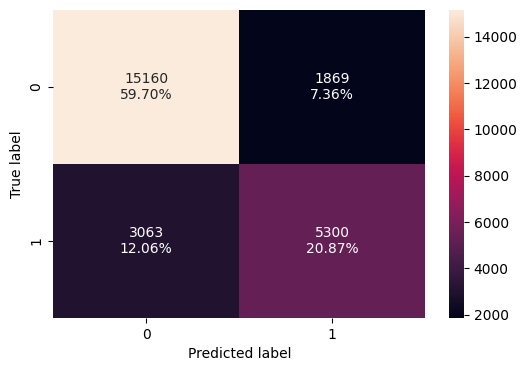

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80577 0.63374    0.73929 0.68246

- True Positives (TP): The booking is canceled, and the model predicted it as canceled.
- True Negatives (TN): The booking is not canceled, and the model predicted it as not canceled.
- False Positives (FP): The model predicted the booking would be canceled, but it was not actually canceled.
- False Negatives (FN): The model predicted the booking would not be canceled, but it was actually canceled.

**Observations:**

- The recall value shows that the model correctly identifies 63.37% of the actual cancellations where we want to catch as many cancellations as possible, this metric is crucial.

In [ ]:
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


**Observations:**

- we get all the col with p val haigher than 0.05 also if it is removed and can affect the others it is considerble

In [ ]:
X_train2 = X_train1[selected_features]

- droping the col with high p-val

## Final Model Summary

In [ ]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 03 Oct 2024   Pseudo R-squ.:                  0.3283
Time:                        19:33:11   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.1794    120.455     -7.614      0.000   -1153.267    -681.092
no_of_adults                       0.1086      0.037      2.913      0.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80541 0.63255    0.73903 0.68166

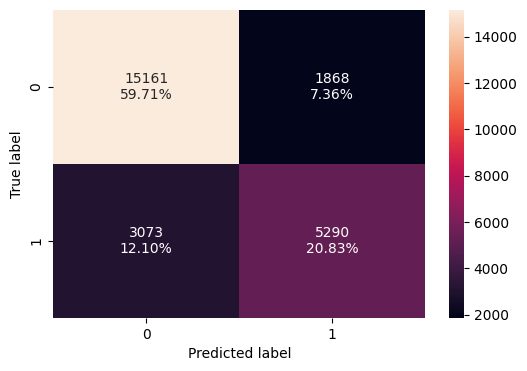

In [ ]:
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [ ]:
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11474         1.16433               1.11476   
Change_odd% -100.00000      11.47364        16.43251              11.47576   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04264                     0.20304    1.01584   
Change_odd%            4.26381                   -79.69621    1.58354   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57315        0.95852         0.06480   
Change_odd%      57.31518       -4.14814       -93.51983   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25715             1.01935   
Change_odd%                      25.71533             1.93514   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22994                        1.17980   
Change_odd%               -77.00624                       17.97969   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33094                         0.70049   
Change_odd%                        33.09412                       -29.95139   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75377                         0.47935   
Change_odd%                       -24.62279                       -52.06495   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38091                         0.23896   
Change_odd%                       -61.90908                       -76.10431   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45259                      0.16751  
Change_odd%                      -54.74055                    -83.24870

**Observations:**

- A 1 unit increase in the number of adults increases the odds of cancellation by 11.47%.
- A 1 unit increase in the number of children increases the odds of cancellation by 16.43%.
- A 1 unit increase in weekend nights increases the odds of cancellation by 11.48%.
- A 1 unit increase in weekday nights increases the odds of cancellation by 4.26%.
- If a guest requires a car parking space, the odds of cancellation decrease by 79.70%. This suggests that guests with parking space requirements are less likely to cancel.
- A 1 day increase in lead time increases the odds of cancellation by 1.58%.
- A 1 year increase increases the odds of cancellation by 57.32%. More recent bookings have higher chances of being canceled.
- The odds of a repeated guest canceling are 93.52% lower compared to first-time guests. Repeated guests are far less likely to cancel.
- A 1 unit increase in previous cancellations increases the odds of a new cancellation by 25.72%.
- A 1 euro increase in average price per room increases the odds of cancellation by 1.94%.
- A 1 unit increase in special requests decreases the odds of cancellation by 77.01%. Guests with more special requests are less likely to cancel.
- Choosing Meal Plan 2 increases the odds of cancellation by 17.98% compared to Meal Plan 1.
- Not selecting a meal plan increases the odds of cancellation by 33.09%.




In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37105927297316743


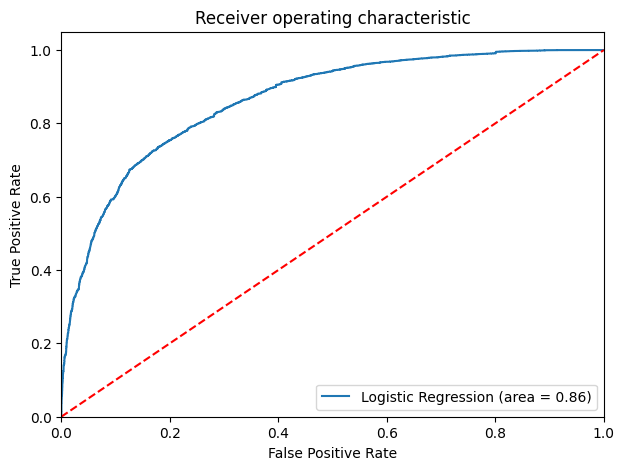

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

###Test

In [ ]:
X_test1 = X_test[list(X_train2.columns)]

In [ ]:
X_test1 = X_test1.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

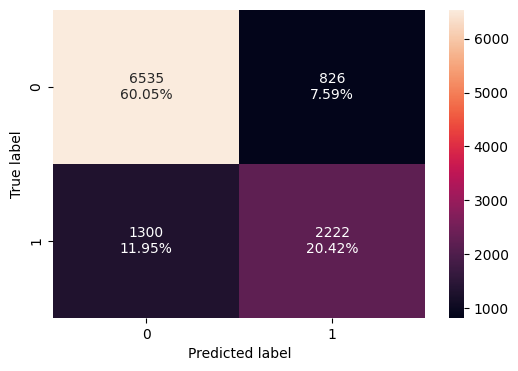

In [ ]:
confusion_matrix_statsmodels(lg2, X_test1, y_test)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_test1, y_test)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

**Observations:**

- i will try with another threshold (i found befor ruc plt)

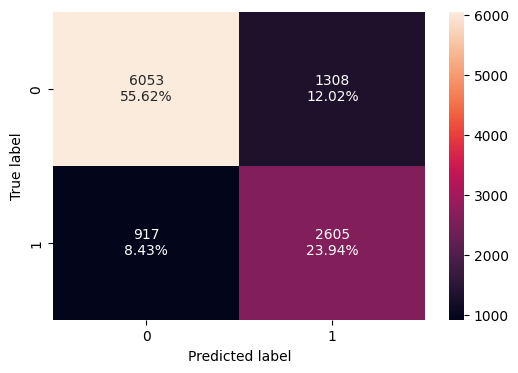

In [ ]:
confusion_matrix_statsmodels(lg2, X_test1, y_test,0.37)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_test1, y_test, 0.37)

Training performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

**Observations:**

- Recall has increased significantly, which is critical for this problem.
- F1 Score has improved, indicating a better balance.

## Building a Decision Tree model

In [ ]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [ ]:
X1 = df.drop(["booking_status"], axis=1)
Y1 = df["booking_status"]

X1 = pd.get_dummies(X1, drop_first=True)

# Splitting data in train and test sets
X_trainM, X_testM, y_trainM, y_testM = train_test_split(
    X1, Y1, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_trainM.shape)
print("Shape of test set : ", X_testM.shape)


Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)


In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt.fit(X_trainM, y_trainM)

DecisionTreeClassifier(random_state=1)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

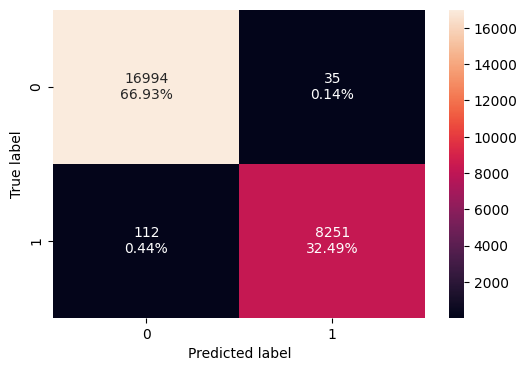

In [ ]:
confusion_matrix_sklearn(dt, X_trainM, y_trainM)

In [ ]:
model_performance_classification_sklearn(dt, X_trainM, y_trainM)

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

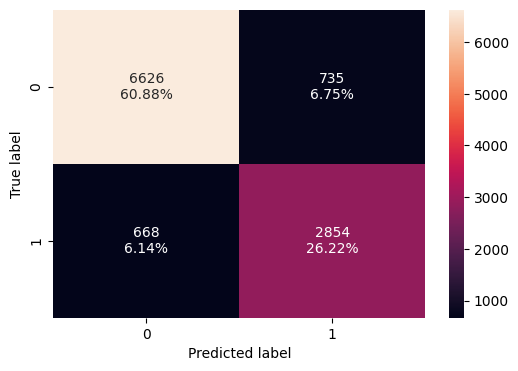

In [ ]:
confusion_matrix_sklearn(dt, X_testM, y_testM)

In [ ]:
model_performance_classification_sklearn(dt, X_testM, y_testM)


Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

**Observations:**

- i think there is no need to class_weight because the tree already has a good recall, precision and F1  

- also it doing great on the test data

In [ ]:
feature_names = list(X1.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


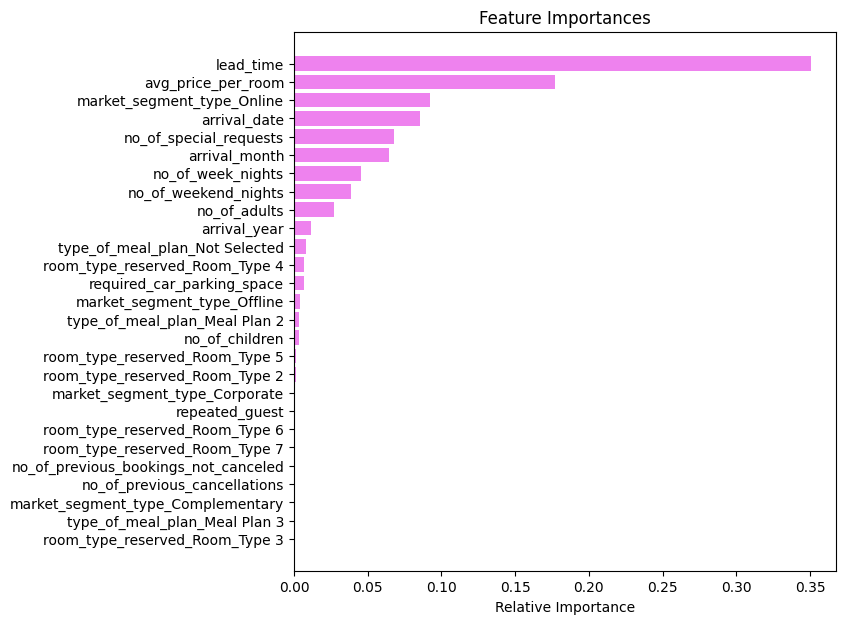

In [ ]:
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Pruning

- we will prune the data to make a the tree less complexity without overfitting on the train data

### Decision Tree (Pre-pruning)

- **GridSearch**

In [ ]:
# Initialize the Decision Tree classifier
estimator = DecisionTreeClassifier(random_state=1)

# Define the parameter grid
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 10, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Define the scoring metric (Recall) to optimize
acc_scorer = make_scorer(recall_score)

# Set up the GridSearchCV
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=acc_scorer, cv=5)

# Fit the grid search to the training data
grid_obj = grid_obj.fit(X_trainM, y_trainM)

# Get the best estimator from the grid search
estimator = grid_obj.best_estimator_

# Fit the best model to the training data
estimator.fit(X_trainM, y_trainM)

# Display the best parameters and performance
print(f"Best Parameters: {grid_obj.best_params_}")
print(f"Best Cross-Validation Recall Score: {grid_obj.best_score_:.4f}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': 2, 'max_leaf_nodes': 50, 'min_samples_split': 10}
Best Cross-Validation Recall Score: 0.8565


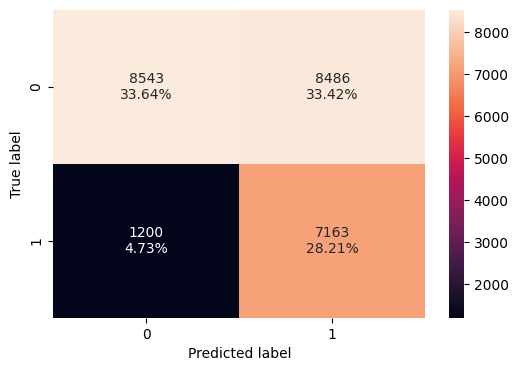

In [ ]:
confusion_matrix_sklearn(estimator, X_trainM, y_trainM)

In [ ]:
model_performance_classification_sklearn(estimator, X_trainM, y_trainM)

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

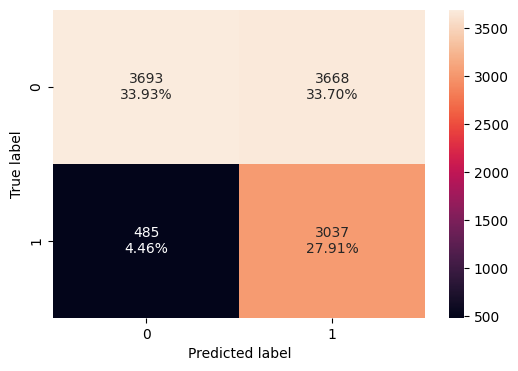

In [ ]:
confusion_matrix_sklearn(estimator, X_testM, y_testM)

In [ ]:
model_performance_classification_sklearn(estimator, X_testM, y_testM)

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

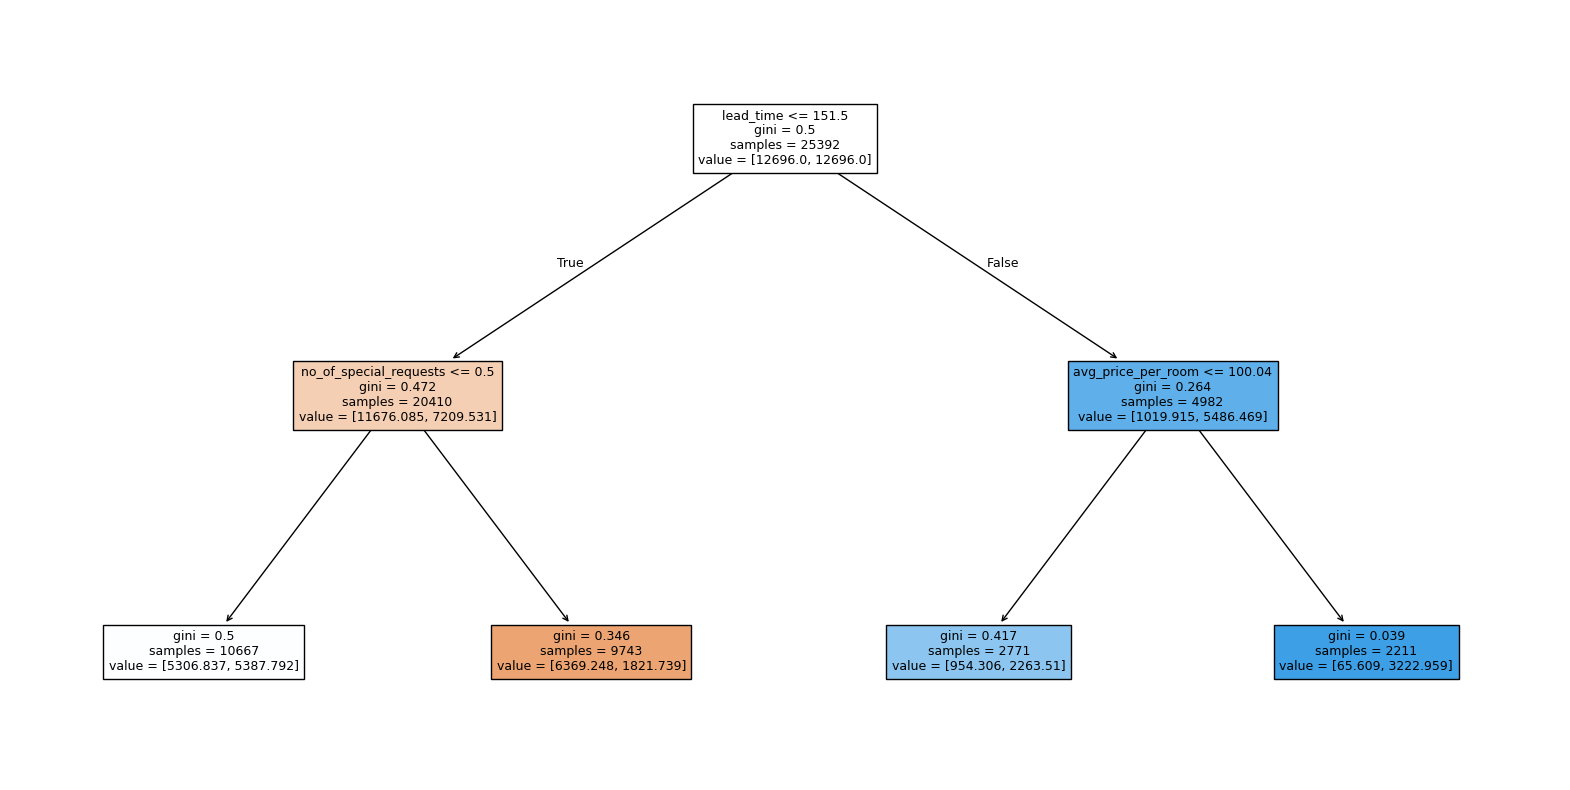

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


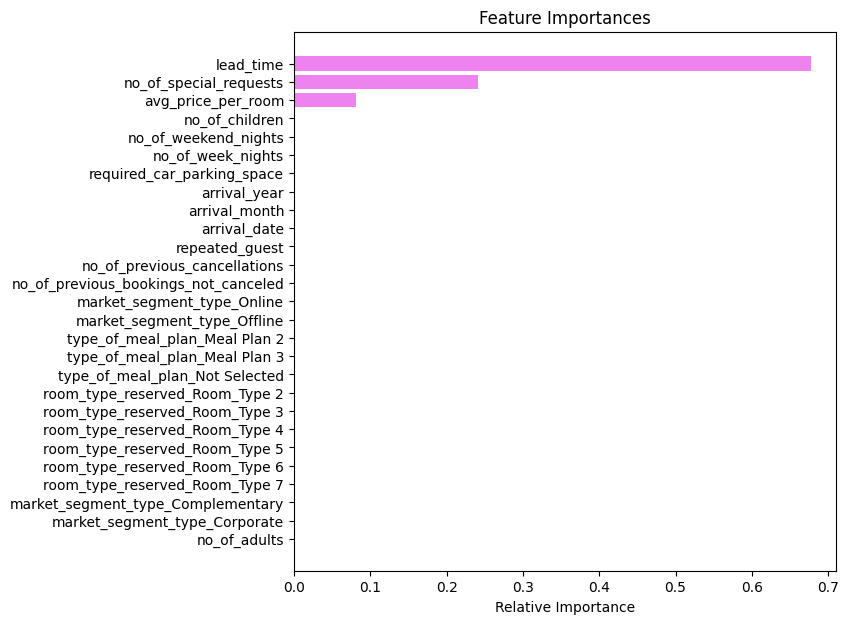

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- The model shows a good balance between recall and precision on both the training and test sets.

- The slight drop in recall and precision between the training and test sets is normal, suggesting the model has maintained a good balance without overfitting.

- **Another GridSearch**

In [ ]:
estimator1 = DecisionTreeClassifier(random_state=1)
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(4, 12, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [2, 5, 10, 20],
}
acc_scorer = make_scorer(recall_score)
grid_obj = GridSearchCV(estimator1, param_grid=parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_trainM, y_trainM)
estimator1 = grid_obj.best_estimator_
estimator1.fit(X_trainM, y_trainM)
print(f"Best Parameters: {grid_obj.best_params_}")
print(f"Best Cross-Validation Recall Score: {grid_obj.best_score_:.4f}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_leaf_nodes': 250, 'min_samples_split': 20}
Best Cross-Validation Recall Score: 0.8396


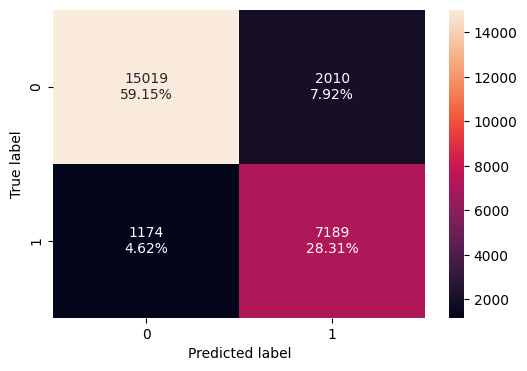

In [ ]:
confusion_matrix_sklearn(estimator1, X_trainM, y_trainM)

In [ ]:
model_performance_classification_sklearn(estimator1, X_trainM, y_trainM)

Accuracy  Recall  Precision      F1
0   0.87461 0.85962    0.78150 0.81870

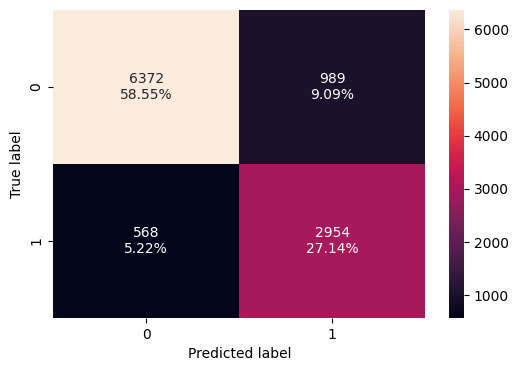

In [ ]:
confusion_matrix_sklearn(estimator1, X_testM, y_testM)

In [ ]:
model_performance_classification_sklearn(estimator1, X_testM, y_testM)

Accuracy  Recall  Precision      F1
0   0.85693 0.83873    0.74918 0.79143

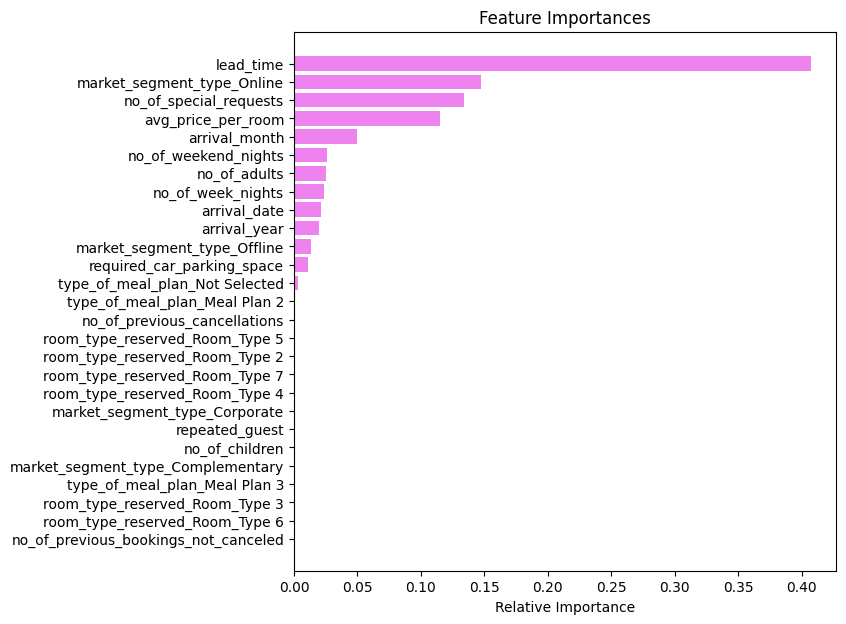

In [ ]:
importances = estimator1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- The model shows a high recall on both the training and test sets, indicating that it is able to identify most of the cancellations.
- There is a decline in precision from training to testing, suggesting that the model is generating more false positives (predicting cancellations when there are none) on the test set.

### Decision Tree (Post pruning)

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_trainM, y_trainM)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

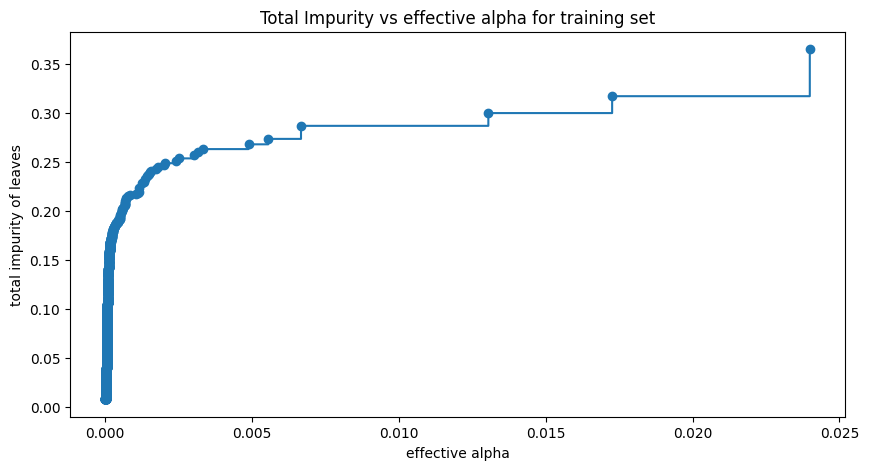

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Train multiple trees using different ccp_alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(X_trainM, y_trainM)
    clfs.append(clf)

In [ ]:
# Calculate recall scores for training set
recall_train = [recall_score(y_trainM, clf.predict(X_trainM)) for clf in clfs]

In [ ]:
# Calculate recall scores for testing set
recall_test = [recall_score(y_testM, clf.predict(X_testM)) for clf in clfs]

In [ ]:
train_scores = [clf.score(X_trainM, y_trainM) for clf in clfs]
test_scores = [clf.score(X_testM, y_testM) for clf in clfs]

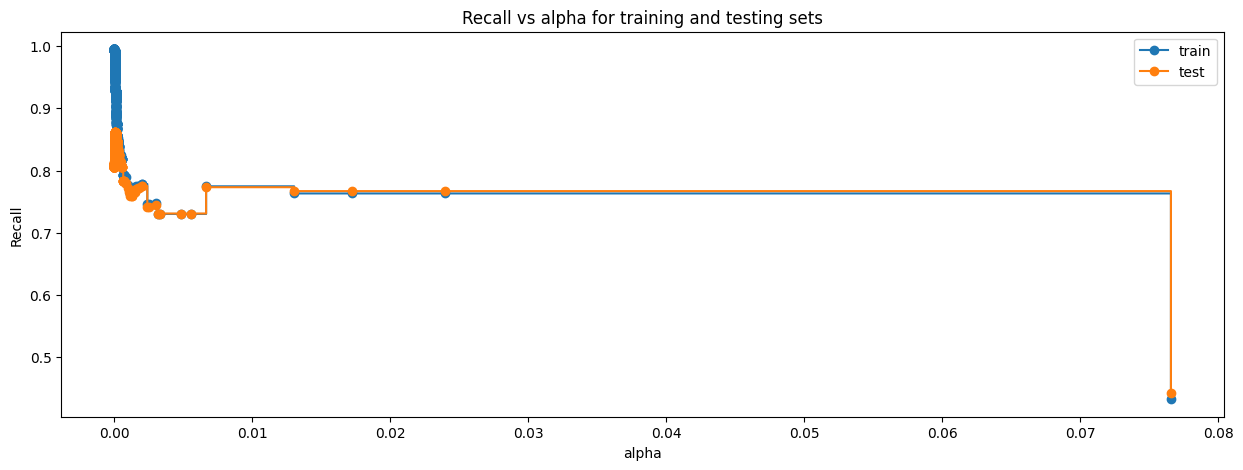

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=8.059769992662237e-05, class_weight='balanced',
                       random_state=1)


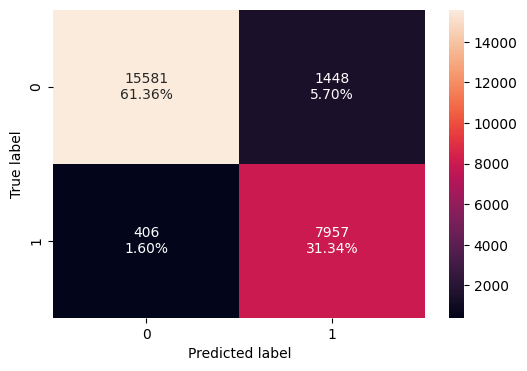

In [ ]:
confusion_matrix_sklearn(best_model, X_trainM, y_trainM)

In [ ]:
model_performance_classification_sklearn(best_model, X_trainM, y_trainM)

Accuracy  Recall  Precision      F1
0   0.92698 0.95145    0.84604 0.89566

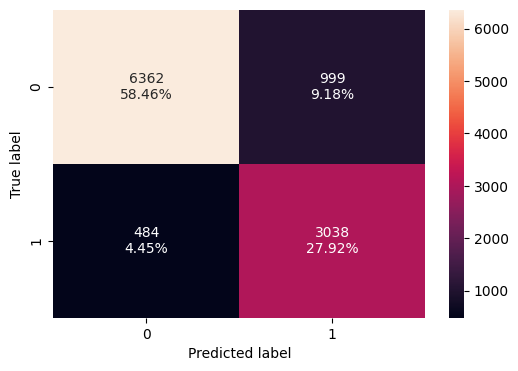

In [ ]:
confusion_matrix_sklearn(best_model, X_testM, y_testM)

In [ ]:
model_performance_classification_sklearn(best_model, X_testM, y_testM)

Accuracy  Recall  Precision      F1
0   0.86373 0.86258    0.75254 0.80381

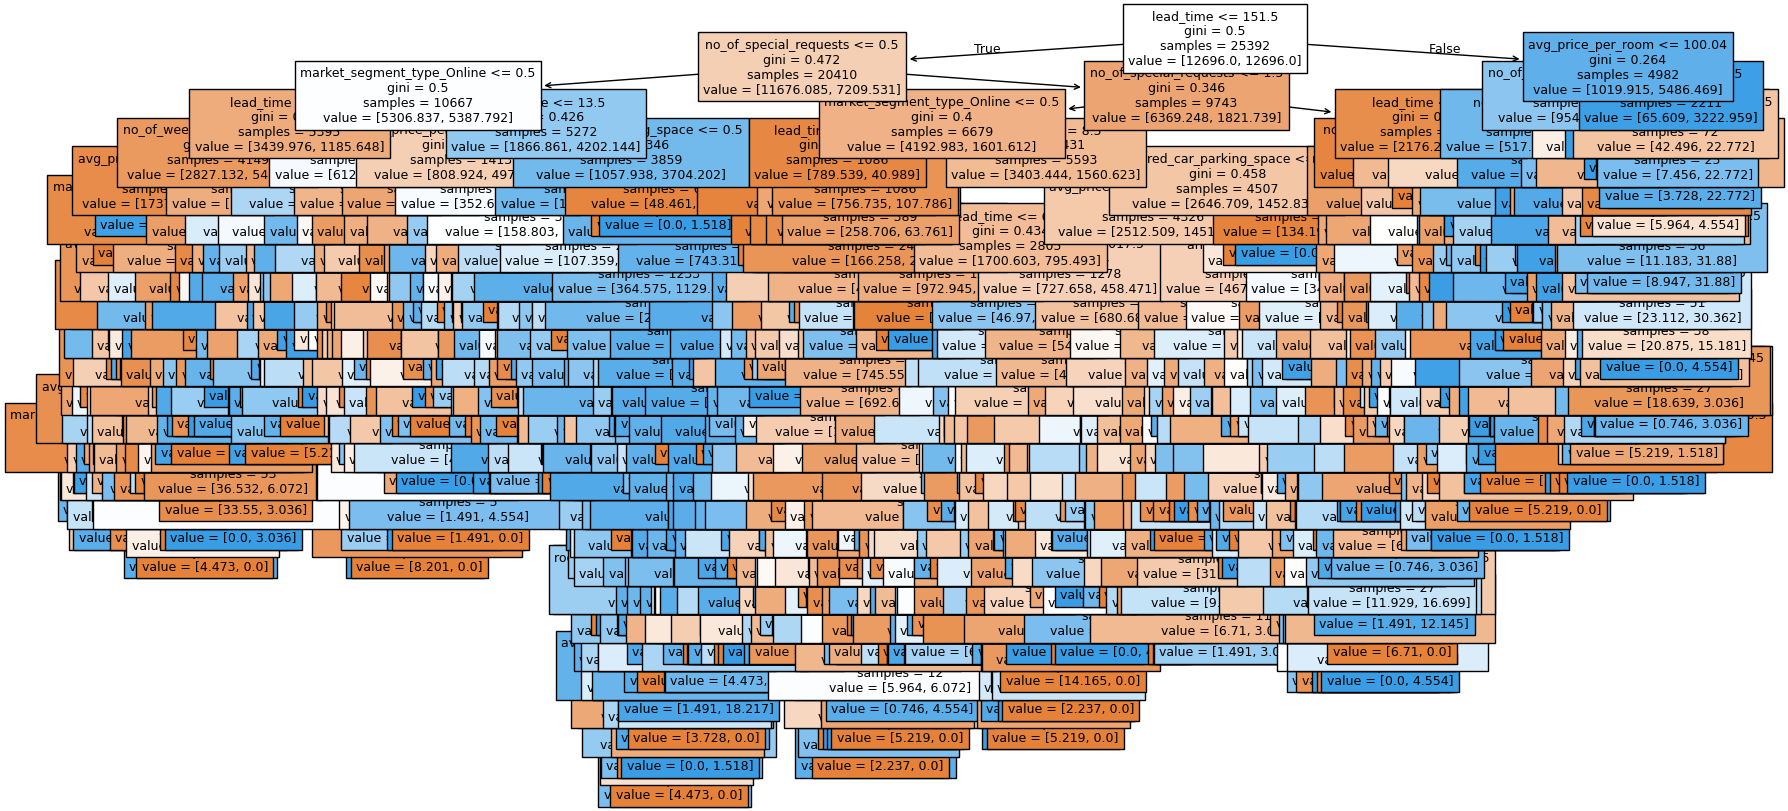

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

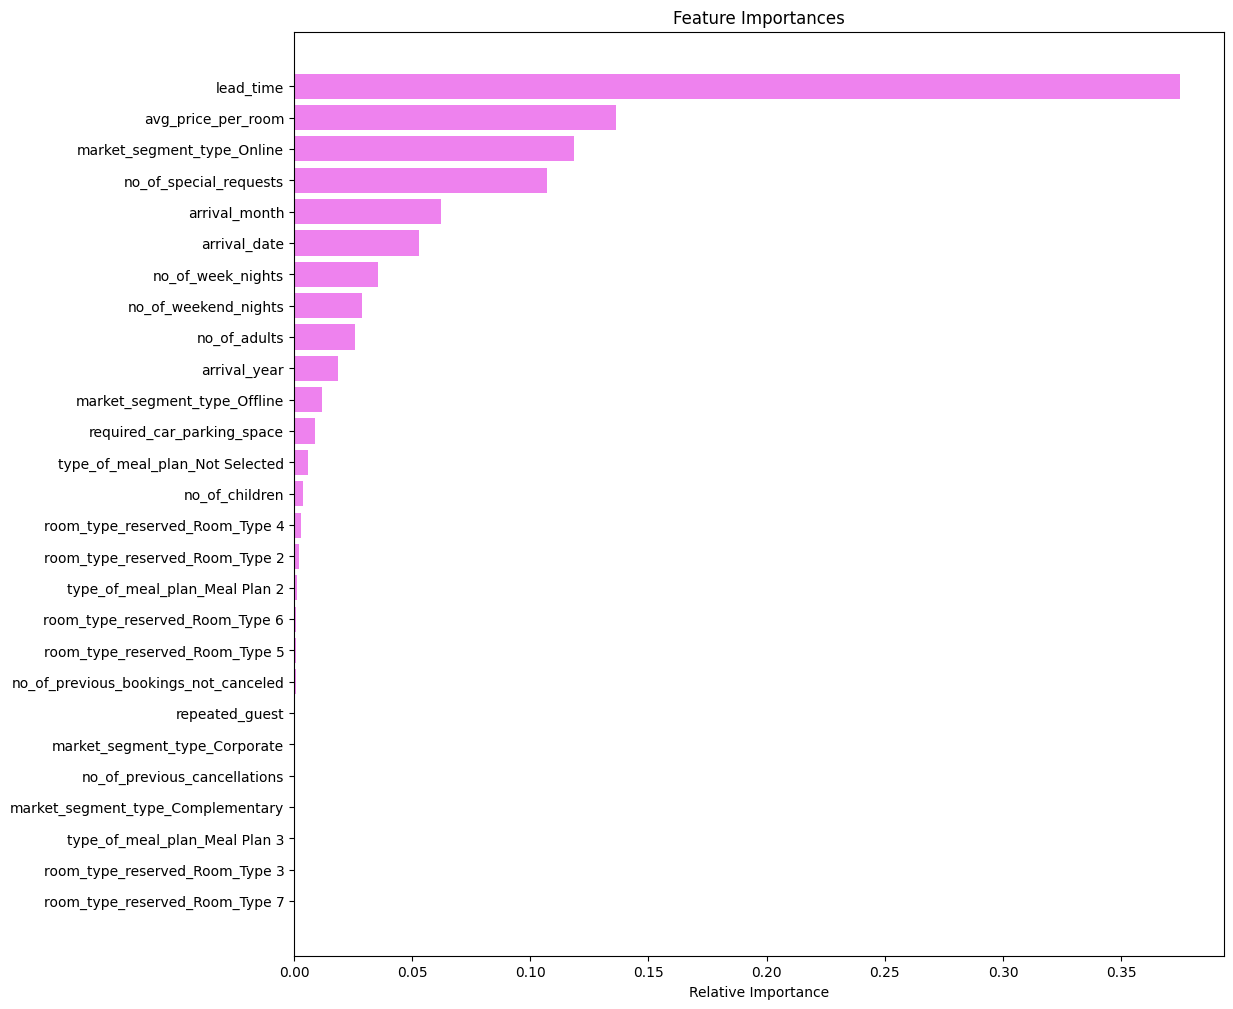

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [ ]:
from sklearn.metrics import roc_auc_score

model_performance = {}

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) if hasattr(model, "predict_proba") else None
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None

    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

    model_performance[model_name] = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Train Precision': precision_score(y_train, y_train_pred),
        'Train Recall': recall_score(y_train, y_train_pred),
        'Train F1': f1_score(y_train, y_train_pred),
        'Train ROC-AUC': train_roc_auc,
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Test F1': f1_score(y_test, y_test_pred),
        'Test ROC-AUC': test_roc_auc,
    }

evaluate_model(dt, 'Decision Tree (Baseline)', X_trainM, y_trainM, X_testM, y_testM)
evaluate_model(estimator, 'Decision Tree (Pre-pruning)', X_trainM, y_trainM, X_testM, y_testM)
evaluate_model(estimator1, 'Decision Tree (Pre-pruning with new gridSearch)', X_trainM, y_trainM, X_testM, y_testM)
evaluate_model(best_model, 'Decision Tree (Post-pruning)', X_trainM, y_trainM, X_testM, y_testM)

df_comparison = pd.DataFrame(model_performance).T

df_comparison

Train Accuracy  \
Decision Tree (Baseline)                                0.99421   
Decision Tree (Pre-pruning)                             0.61854   
Decision Tree (Pre-pruning with new gridSearch)         0.87461   
Decision Tree (Post-pruning)                            0.92698   

                                                 Train Precision  \
Decision Tree (Baseline)                                 0.99578   
Decision Tree (Pre-pruning)                              0.45773   
Decision Tree (Pre-pruning with new gridSearch)          0.78150   
Decision Tree (Post-pruning)                             0.84604   

                                                 Train Recall  Train F1  \
Decision Tree (Baseline)                              0.98661   0.99117   
Decision Tree (Pre-pruning)                           0.85651   0.59662   
Decision Tree (Pre-pruning with new gridSearch)       0.85962   0.81870   
Decision Tree (Post-pruning)                          0.95145   0.89566   

                                                 Train ROC-AUC  Test Accuracy  \
Decision Tree (Baseline)                               0.99989        0.87108   
Decision Tree (Pre-pruning)                            0.76144        0.61840   
Decision Tree (Pre-pruning with new gridSearch)        0.94778        0.85693   
Decision Tree (Post-pruning)                           0.97907        0.86373   

                                                 Test Precision  Test Recall  \
Decision Tree (Baseline)                                0.79521      0.81034   
Decision Tree (Pre-pruning)                             0.45295      0.86229   
Decision Tree (Pre-pruning with new gridSearch)         0.74918      0.83873   
Decision Tree (Post-pruning)                            0.75254      0.86258   

                                                 Test F1  Test ROC-AUC  
Decision Tree (Baseline)                         0.80270       0.85822  
Decision Tree (Pre-pruning)                      0.59392       0.76522  
Decision Tree (Pre-pruning with new gridSearch)  0.79143       0.93125  
Decision Tree (Post-pruning)                     0.80381       0.91678

**Observations**
- the Decision Tree (Post-pruning) model shows the best balance between training and test performance. It has the highest Test Recall (86.26%) while maintaining a good Test Accuracy (86.37%), Test F1-score (80.38%), and ROC-AUC (91.68%), indicating that it performs well in capturing cancellations while minimizing false positives and false negatives.

## Actionable Insights and Recommendations

- **Adjust Pricing for Early Bookings:**
 - Guests who book far in advance tend to cancel more often. To mitigate this, consider offering smaller discounts for early bookings or implementing dynamic pricing. This way, while you encourage early reservations, you’re not giving away too much on rates for bookings that might get canceled later.

- **Implement Stricter Policies for Frequent Cancellations:**
 - Some guests show a pattern of frequent cancellations. For these guests, consider stricter policies like higher cancellation fees or even non-refundable options. This will help discourage repeated cancellations and protect the hotel's revenue.

-** Encourage Repeat Guests with Loyalty Programs:**
 - Repeat guests are less likely to cancel their reservations, which makes them valuable to the hotel. Offer them special discounts or exclusive loyalty rewards. This can not only increase direct bookings but also reduce cancellations from these guests.

- **Penalty Fees for High-Risk Segments:**
 - Bookings made through certain channels like Online or Offline agents tend to have a higher cancellation rate. For these segments, consider implementing higher penalty fees or stricter cancellation terms. Additionally, providing non-refundable booking options for these channels can help reduce cancellations.

- F**lexible Policies for Corporate Clients:**
 - Corporate clients tend to cancel less frequently. Offering them more flexible booking policies, such as full refunds or no cancellation fees, can help build stronger relationships with these clients and encourage repeat business.

- **Non-Refundable Options for Low-Request Bookings:**
 - Guests making straightforward bookings without many special requests have a higher chance of canceling. For these types of bookings, consider offering non-refundable or partially refundable options to secure more committed reservations.

- **Proactive Cancellation Prediction:**
  - With the predictive model in place, you can identify which bookings are at high risk of being canceled. Set up alerts for these high-risk bookings, allowing you to overbook slightly or take other proactive measures to minimize the impact of potential cancellations.

- **Personalized Promotions:**
 - Certain room types or meal plans have higher cancellation rates. Offering personalized promotions, such as room upgrades or meal plan enhancements, can incentivize guests to stick with their bookings and reduce cancellations.

- **Introduce Booking Deposits for High-Risk Guests:**
 - Guests with long lead times or a history of multiple cancellations are more likely to cancel. Requiring these guests to make a deposit or pay in advance can encourage them to keep their reservations and reduce cancellations.

- **Enhance Booking Experience with Better Communication:**
 - Guests who make special requests tend to follow through with their bookings. Make it easy for guests to communicate their needs, and follow up regularly with those who have made special requests.